# Objective

The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, indentify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
df = pd.read_csv("Cardiotocographic.csv")

# Dataset Overview

1. LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which    represents the average fetal heart rate over a period.
2. AC - Could represent "Accelerations" in the FHR. Accelerations    are usually a sign of fetal well-being.
3. FM - May indicate "Fetal Movements" detected by the monitor.
4. UC - Likely denotes "Uterine Contractions", which can impact      the FHR pattern.
5. DL - Could stand for "Decelerations Late" with respect to        uterine contractions, which can be a sign of fetal distress.
6. DS - May represent "Decelerations Short" or decelerations of      brief duration.
7. DP - Could indicate "Decelerations Prolonged", or long-lasting    decelerations.
8. ASTV - Might refer to "Percentage of Time with Abnormal Short    Term Variability" in the FHR.
9. MSTV - Likely stands for "Mean Value of Short Term                Variability" in the FHR.
10. ALTV - Could represent "Percentage of Time with Abnormal Long     Term Variability" in the FHR.
11. MLTV - Might indicate "Mean Value of Long Term Variability"       in the FHR.


In [3]:
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [4]:
df.tail()

LB        AC        FM        UC   DL   DS   DP  ASTV  MSTV  \
2121  140.0  0.000000  0.961268  0.007426  0.0  0.0  0.0  79.0   0.2   
2122  140.0  0.000775  0.000000  0.006979  0.0  0.0  0.0  78.0   0.4   
2123  140.0  0.000980  0.000000  0.006863  0.0  0.0  0.0  79.0   0.4   
2124  140.0  0.000679  0.000000  0.006110  0.0  0.0  0.0  78.0   0.4   
2125  142.0  0.001616 -0.000188  0.008078  0.0  0.0  0.0  74.0   0.4   

           ALTV  MLTV  Width  Tendency       NSP  
2121  25.000000   7.2   40.0       0.0  2.000000  
2122  22.000000   7.1   66.0       1.0  2.000000  
2123  20.000000   6.1   67.0       1.0  1.990464  
2124  27.000000   7.0   66.0       1.0  2.000000  
2125  35.857183   5.0   42.0       0.0  1.000000

In [5]:
df.shape

(2126, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


# Data Cleaning and Preparation

As you can see we got the datatypes correct, but there might be missing values in our datasets. Let's find and handle the missing datas.

In [7]:
df.isnull().sum() #missing values in each column

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

There are missing values in our dataset. Let's check if the missing values are less than 55 or not.

In [8]:
df.isnull().mean()*100 #percentage missing values

LB          0.987770
AC          0.940734
FM          0.000000
UC          0.000000
DL          0.000000
DS          0.987770
DP          0.987770
ASTV        0.000000
MSTV        0.000000
ALTV        0.000000
MLTV        0.987770
Width       0.987770
Tendency    0.987770
NSP         0.987770
dtype: float64

As you can see the columns where datas are missing are less than 5% in every column.
Let's cross check it by manually printing the column names where the missing datas are less than 5%.


In [9]:
cols = [i for i in df.columns if df[i].isnull().mean()*100 <= 5 and df[i].isnull().mean()*100 >= 0]
cols

['LB',
 'AC',
 'FM',
 'UC',
 'DL',
 'DS',
 'DP',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'Width',
 'Tendency',
 'NSP']

In [10]:
df[cols].sample(5) #Sample data of the rows where datas are missing

LB        AC        FM        UC        DL   DS        DP  ASTV  \
1207  136.0  0.005825  0.000000  0.007767  0.000000  0.0  0.000000  45.0   
1928    NaN       NaN  0.002976  0.004960  0.002976  NaN       NaN  63.0   
270   124.0  0.010008  0.000000  0.006672  0.000834  0.0  0.000000  34.0   
1289  115.0  0.001852  0.000000  0.009259  0.003704  0.0  0.001852  15.0   
908   146.0  0.008419  0.000000  0.007484  0.000000  0.0  0.000000  28.0   

          MSTV  ALTV  MLTV  Width  Tendency  NSP  
1207  0.800000   2.0   6.4   29.0       0.0  1.0  
1928  1.700000   5.0   NaN    NaN       NaN  NaN  
270   1.000000   0.0   3.1   42.0       0.0  1.0  
1289  2.318791   0.0   5.6   92.0      -1.0  1.0  
908   1.300000   1.0   6.9   65.0       0.0  1.0

Let's find out how much data we are gonna have after we drop the rows with missing values in their columns.


In [11]:
len(df[cols].dropna())/len(df)

0.9901222953904045

Now you can see that we will have more than 99% of data in our dataset after dropping the row with null values.

Let's drop the rows with missing values and store the datas without any missing values in a new dataset.

In [12]:
new_df = df[cols].dropna()

In [13]:
df.shape , new_df.shape # comparision of old dataset and new dataset's shapes.

((2126, 14), (2105, 14))

array([[<AxesSubplot:title={'center':'LB'}>,
        <AxesSubplot:title={'center':'AC'}>,
        <AxesSubplot:title={'center':'FM'}>,
        <AxesSubplot:title={'center':'UC'}>],
       [<AxesSubplot:title={'center':'DL'}>,
        <AxesSubplot:title={'center':'DS'}>,
        <AxesSubplot:title={'center':'DP'}>,
        <AxesSubplot:title={'center':'ASTV'}>],
       [<AxesSubplot:title={'center':'MSTV'}>,
        <AxesSubplot:title={'center':'ALTV'}>,
        <AxesSubplot:title={'center':'MLTV'}>,
        <AxesSubplot:title={'center':'Width'}>],
       [<AxesSubplot:title={'center':'Tendency'}>,
        <AxesSubplot:title={'center':'NSP'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

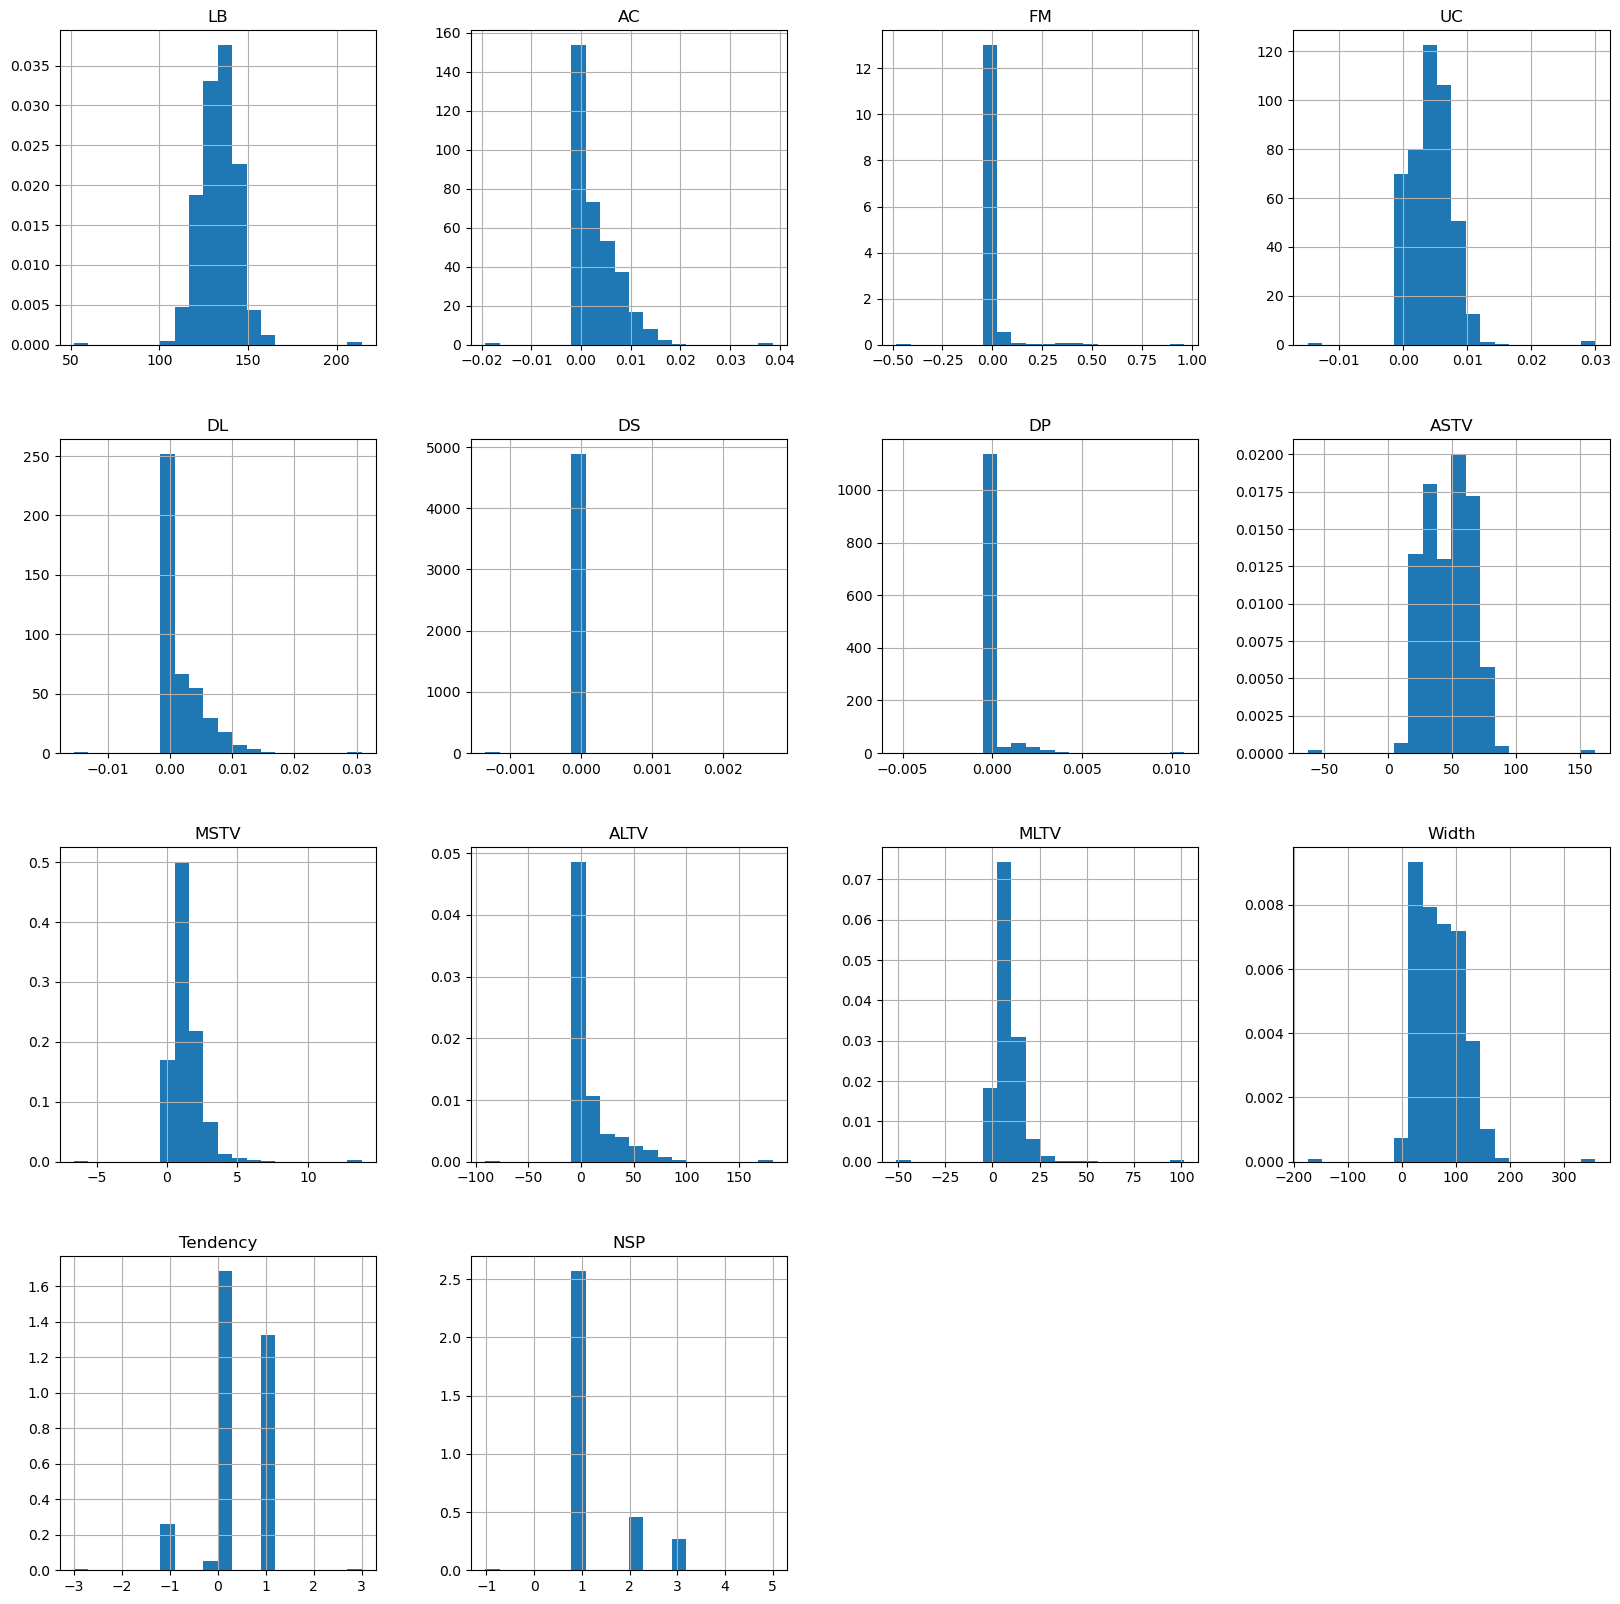

In [14]:
df.hist(bins = 20, density = True, figsize = (20,20)) # data distribution of new dataset before removing the missing values 

array([[<AxesSubplot:title={'center':'LB'}>,
        <AxesSubplot:title={'center':'AC'}>,
        <AxesSubplot:title={'center':'FM'}>,
        <AxesSubplot:title={'center':'UC'}>],
       [<AxesSubplot:title={'center':'DL'}>,
        <AxesSubplot:title={'center':'DS'}>,
        <AxesSubplot:title={'center':'DP'}>,
        <AxesSubplot:title={'center':'ASTV'}>],
       [<AxesSubplot:title={'center':'MSTV'}>,
        <AxesSubplot:title={'center':'ALTV'}>,
        <AxesSubplot:title={'center':'MLTV'}>,
        <AxesSubplot:title={'center':'Width'}>],
       [<AxesSubplot:title={'center':'Tendency'}>,
        <AxesSubplot:title={'center':'NSP'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

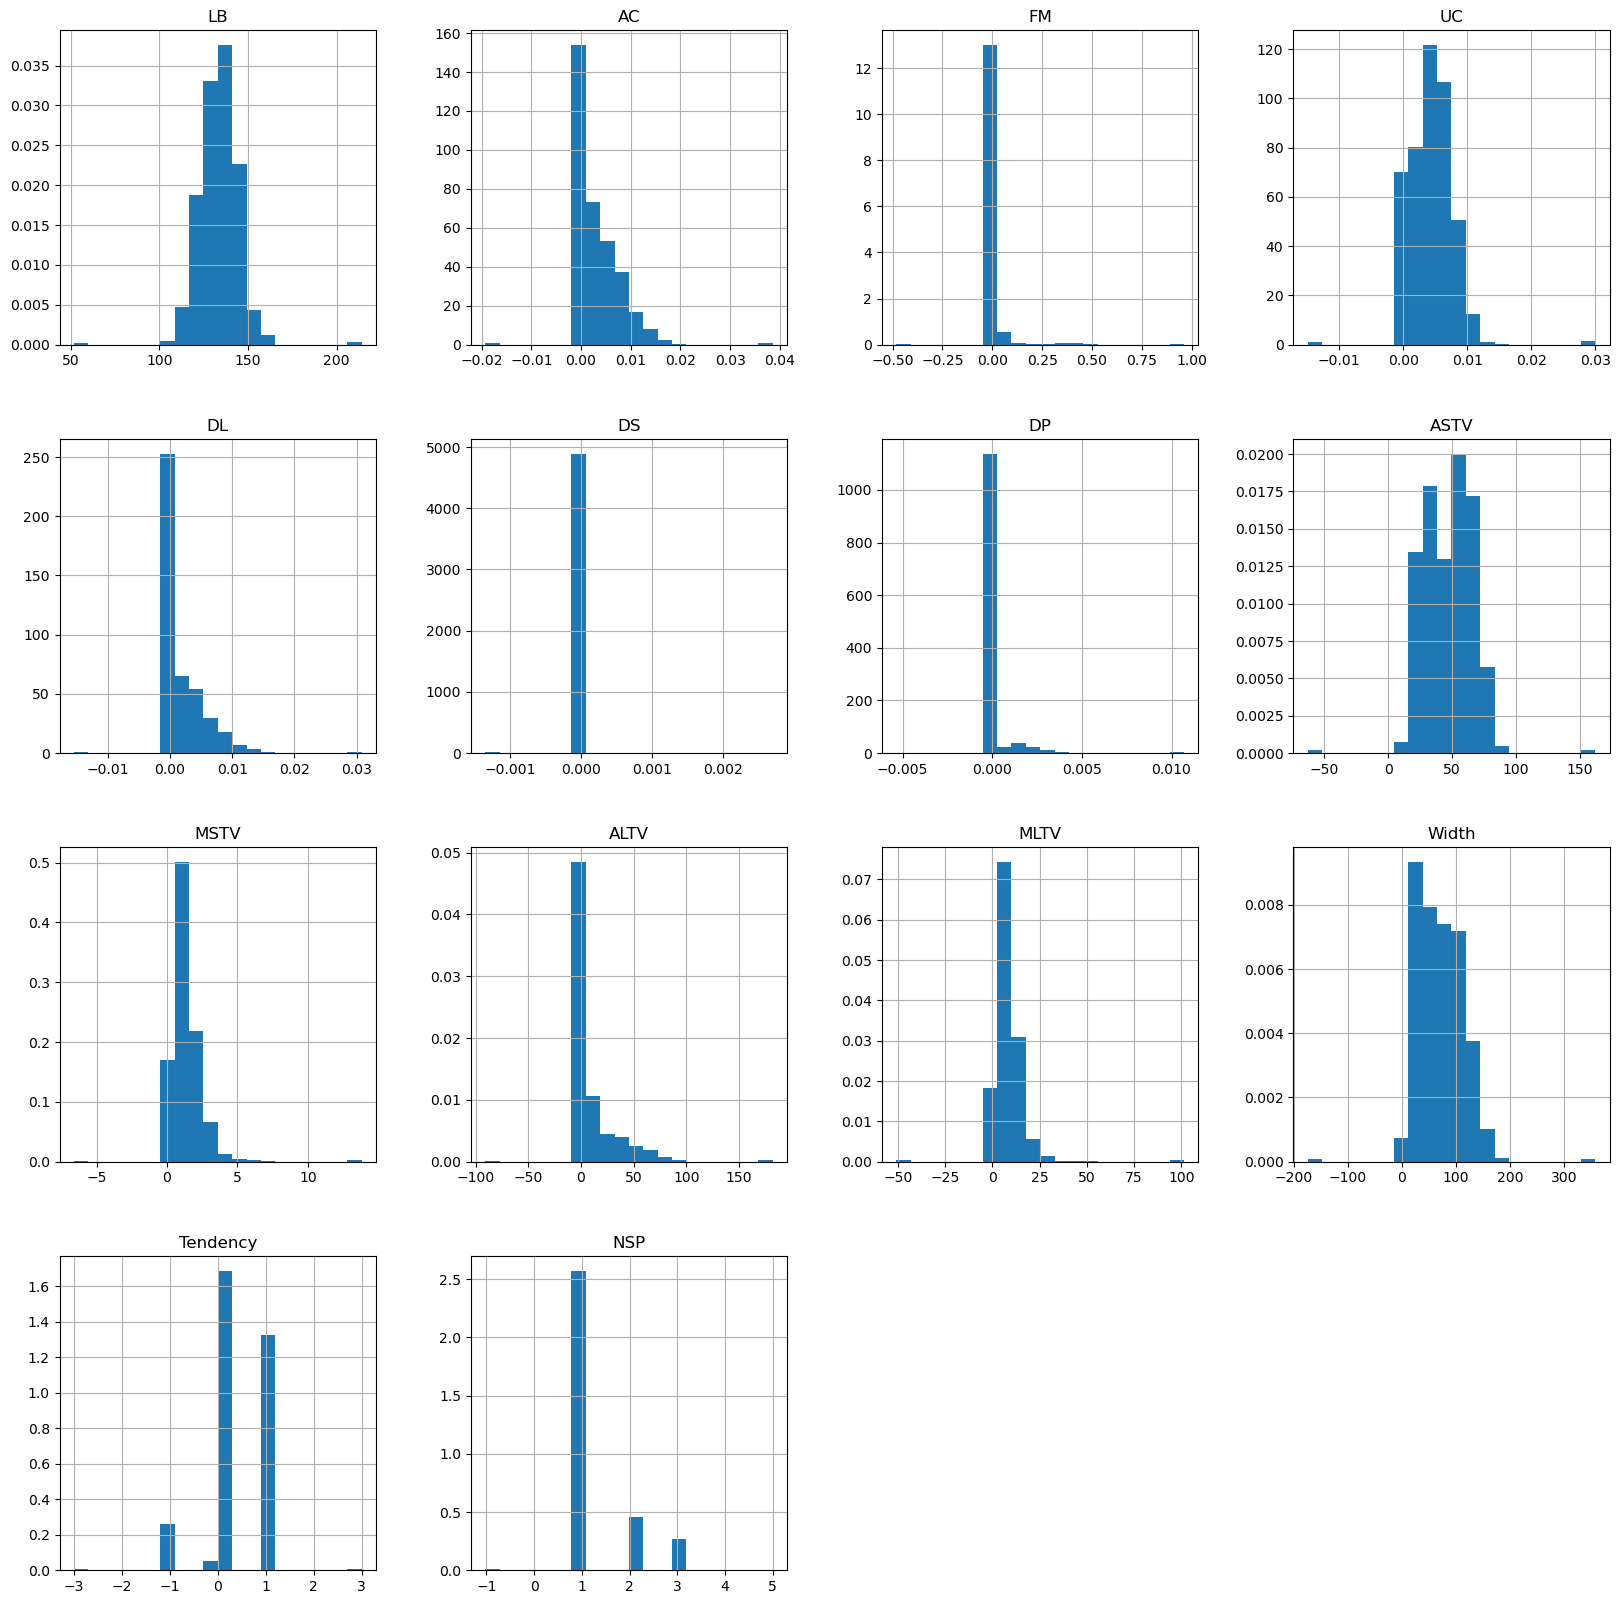

In [15]:
new_df.hist(bins = 20, density = True, figsize = (20,20)) #data distribution of new dataset after removing the missing values

Now we are gonna compare the data distribution of each column from old dataset where we had missing values preent with the dataset distribution of same columns in new dataset where missing values are removed.

<AxesSubplot:>

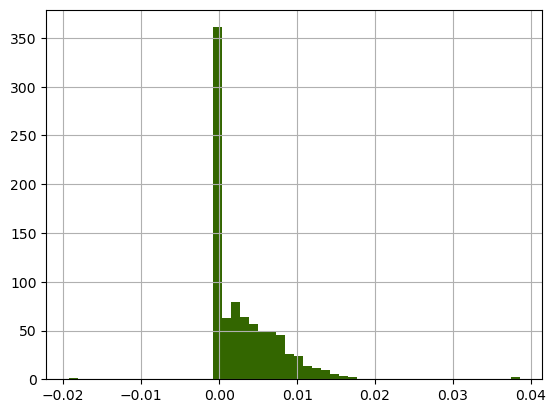

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['AC'].hist(bins = 50, ax=ax, density = True, color = "red")
new_df['AC'].hist(bins = 50, ax=ax, density =True, color = "green", alpha=0.8)

<AxesSubplot:>

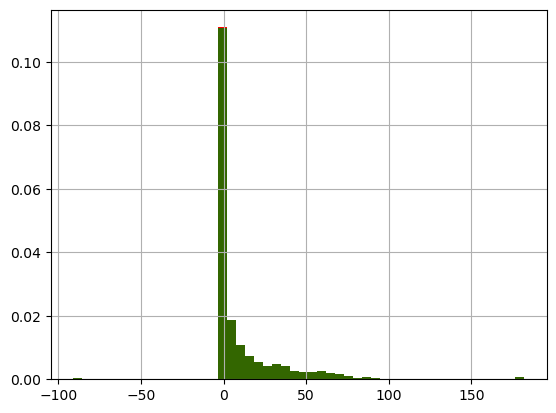

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['ALTV'].hist(bins=50, ax=ax, density = True, color ='red')
new_df['ALTV'].hist(bins=50, ax=ax, density = True, color ='green', alpha =0.8)

<AxesSubplot:>

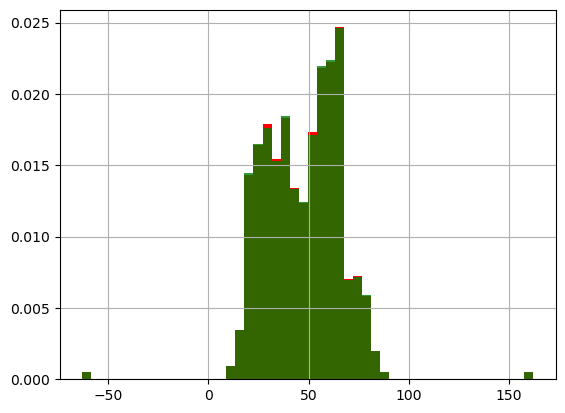

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['ASTV'].hist(bins = 50, ax=ax, density = True, color="red")
new_df['ASTV'].hist(bins = 50, ax=ax, density = True, color = 'green', alpha=0.8)

<AxesSubplot:>

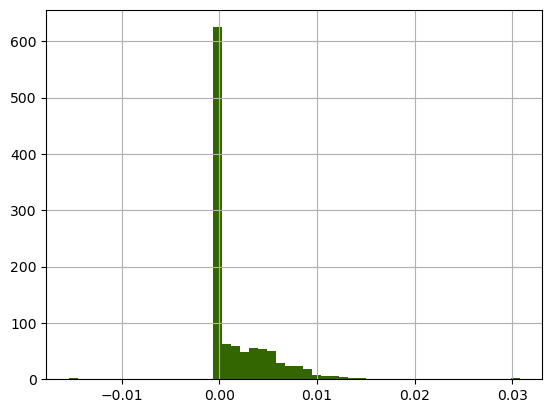

In [19]:
fig = plt.figure()
ax= fig.add_subplot(111)

df['DL'].hist(bins=50,ax=ax,density=True, color='red')
df['DL'].hist(bins =50 ,ax=ax, density = True,color='green',alpha=0.8)

<AxesSubplot:>

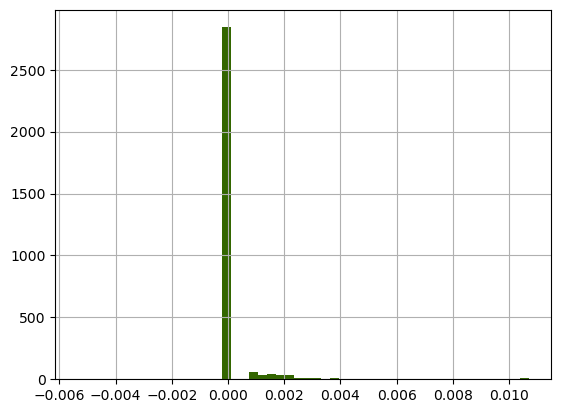

In [20]:
fig = plt.figure()
ax= fig.add_subplot(111)

df['DP'].hist(bins = 50,ax=ax, density = True, color='red')
new_df['DP'].hist(bins = 50, ax=ax, density = True, color='green',alpha = 0.8)

<AxesSubplot:>

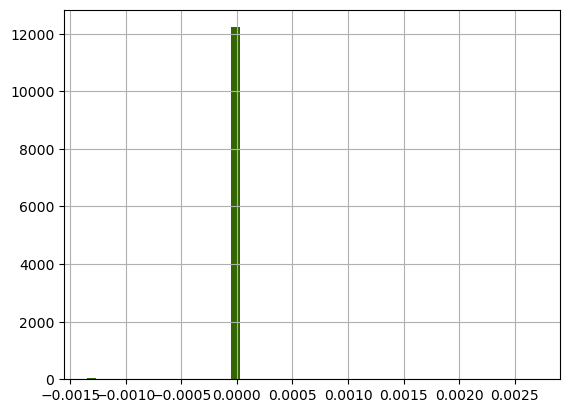

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['DS'].hist(bins=50, ax=ax, density = True, color='red')
new_df['DS'].hist(bins = 50, ax=ax, density = True, color='green',alpha = 0.8)

<AxesSubplot:>

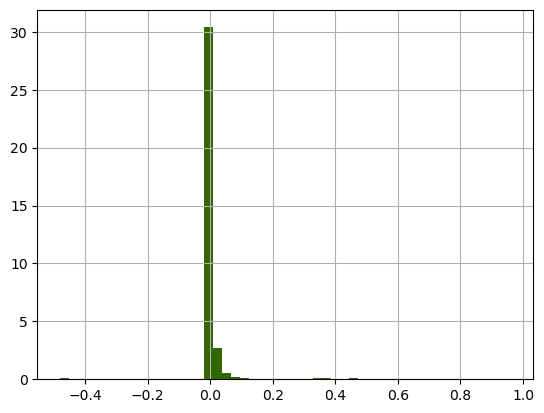

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['FM'].hist(bins = 50, ax=ax, density = True, color="red")
new_df['FM'].hist(bins = 50, ax=ax, density = True, color ='green',alpha = 0.8)

<AxesSubplot:>

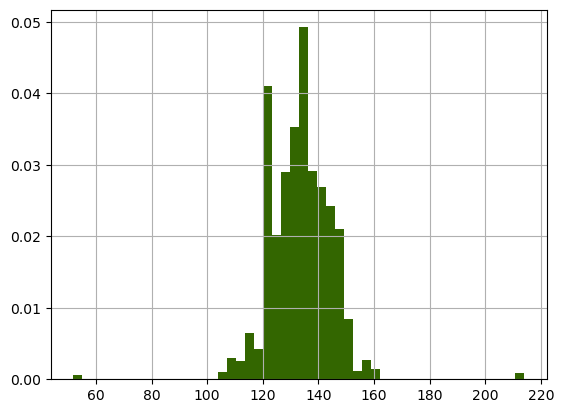

In [23]:
fig = plt.figure()
ax= fig.add_subplot(111)

df['LB'].hist(bins= 50, ax=ax, density = True, color='red')
new_df['LB'].hist(bins= 50, ax=ax, density = True, color='green',alpha = 0.8)

<AxesSubplot:>

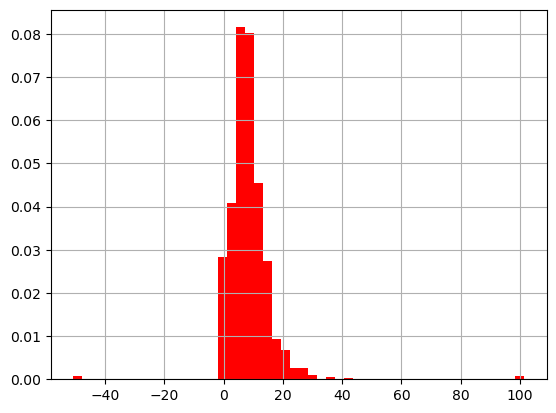

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['MLTV'].hist(bins=50, ax=ax, density=True, color='red')
new_df['MLTV'].hist(bins=50, ax=ax, density = True, color='red', alpha = 0.8)

<AxesSubplot:>

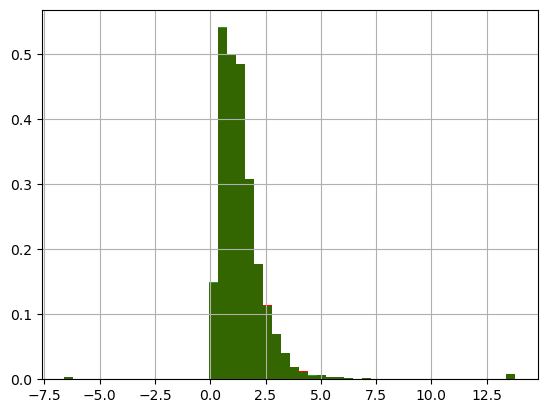

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['MSTV'].hist(bins = 50, ax=ax, density = True, color='red')
new_df['MSTV'].hist(bins = 50, ax=ax, density = True, color = 'green',alpha=0.8)

<AxesSubplot:>

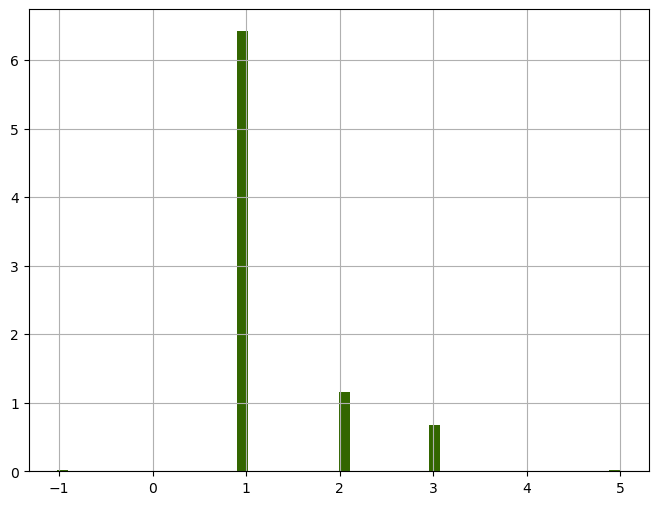

In [26]:
fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

df['NSP'].hist(bins = 50, ax=ax, density =True, color='red')
new_df['NSP'].hist(bins = 50, ax=ax,density=50,color='green',alpha=0.8)

<AxesSubplot:>

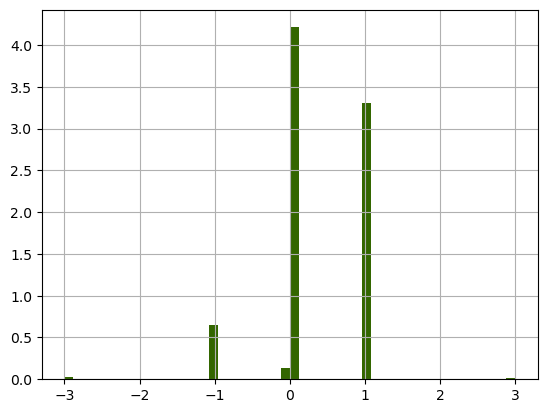

In [27]:
fig=plt.figure()
ax= fig.add_subplot(111)

df['Tendency'].hist(bins = 50, ax=ax, density = True, color='red')
new_df['Tendency'].hist(bins= 50, ax=ax, density = True,color='green',alpha=0.8)

<AxesSubplot:>

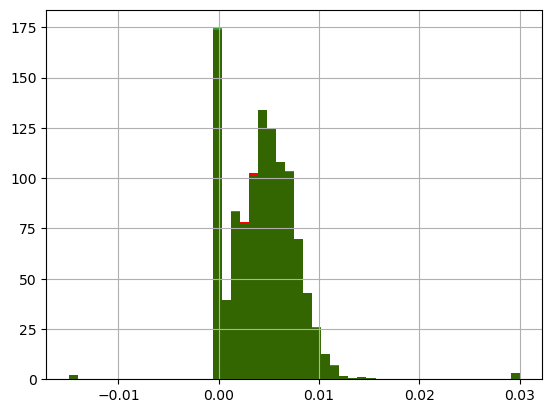

In [28]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['UC'].hist(bins = 50, ax=ax, density=True, color='red')
new_df['UC'].hist(bins=50,ax=ax,density = True, color='green',alpha=0.8)

<AxesSubplot:>

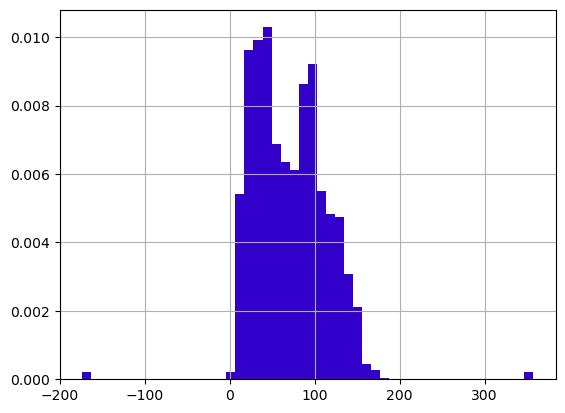

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Width'].hist(bins=50,ax=ax,density=True, color='red')
new_df['Width'].hist(bins=50,ax=ax,density=True,color='blue',alpha=0.8)

From the overlapping of histograms you can notice that the data distribution of the new dataset is almost same the data distribution of the old dataset

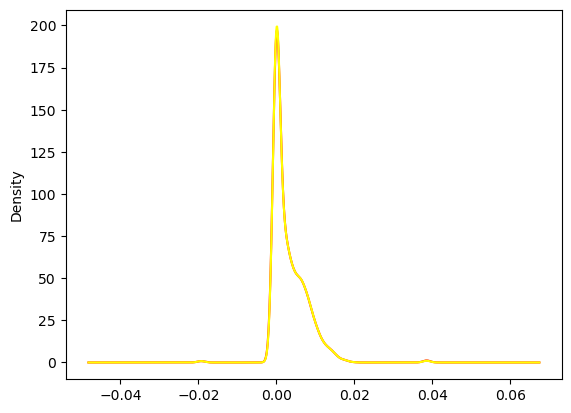

In [30]:
fig= plt.figure()
ax = fig.add_subplot(111)

df['AC'].plot.density(color='red')
new_df['AC'].plot.density(color='yellow')
plt.show()

<AxesSubplot:ylabel='Density'>

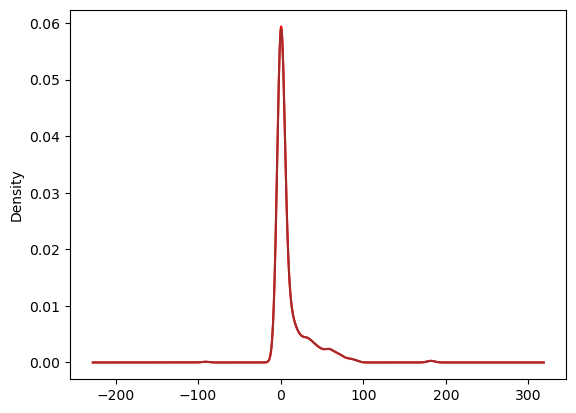

In [31]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['ALTV'].plot.density(color='red')
new_df['ALTV'].plot.density(color='brown')

<AxesSubplot:ylabel='Density'>

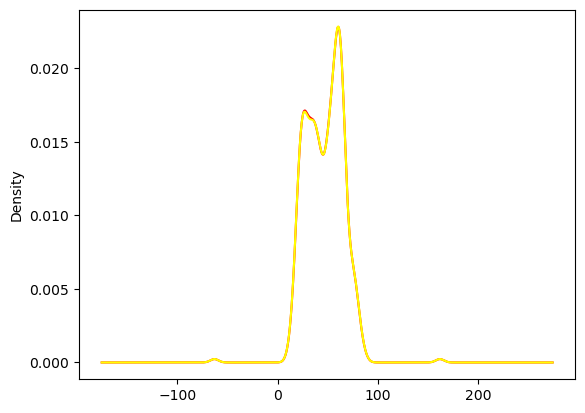

In [32]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['ASTV'].plot.density(color='red')
new_df['ASTV'].plot.density(color='yellow')

<AxesSubplot:ylabel='Density'>

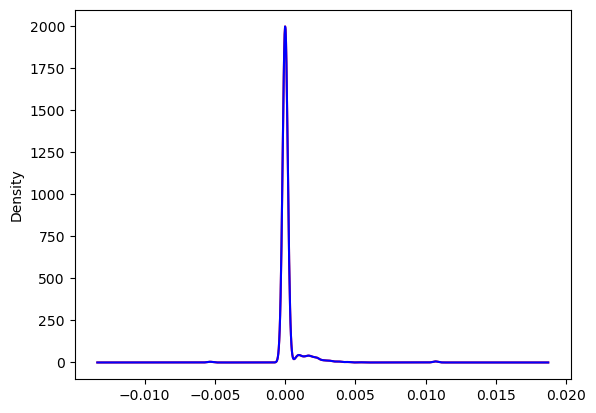

In [33]:
fig = plt.figure()
ax=fig.add_subplot(111)

df['DP'].plot.density(color='red')
new_df['DP'].plot.density(color='blue')

<AxesSubplot:ylabel='Density'>

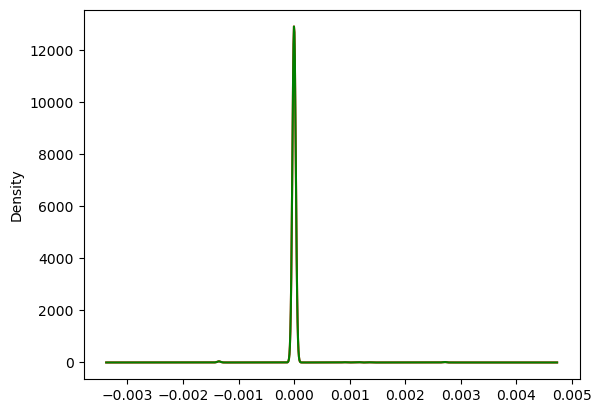

In [34]:
fig = plt.figure()
ax= fig.add_subplot(111)

df['DS'].plot.density(color='red')
new_df['DS'].plot.density(color='green')

<AxesSubplot:ylabel='Density'>

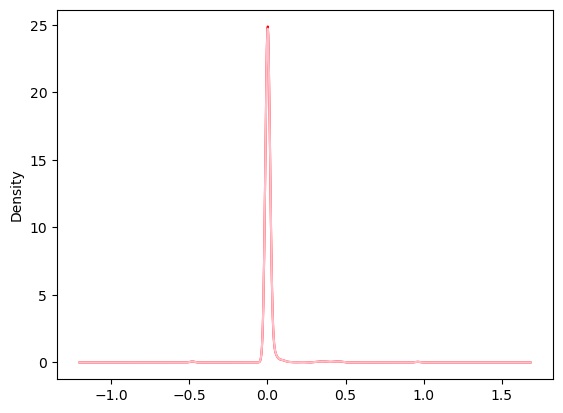

In [35]:
fig = plt.figure()
ax= fig.add_subplot(111)

df['FM'].plot.density(color='red')
new_df['FM'].plot.density(color='pink')

<AxesSubplot:ylabel='Density'>

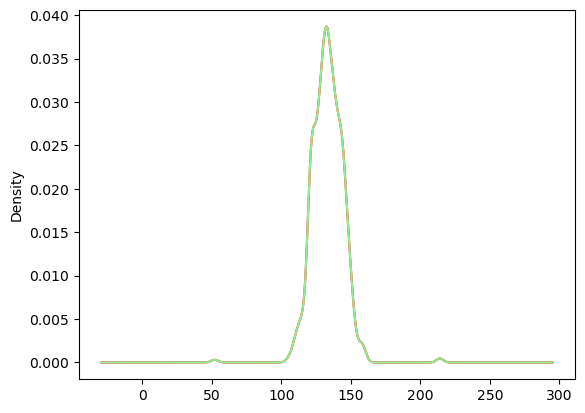

In [36]:
fig= plt.figure()
ax = fig.add_subplot(111)

df['LB'].plot.density(color='red')
new_df['LB'].plot.density(color='lightgreen')

<AxesSubplot:ylabel='Density'>

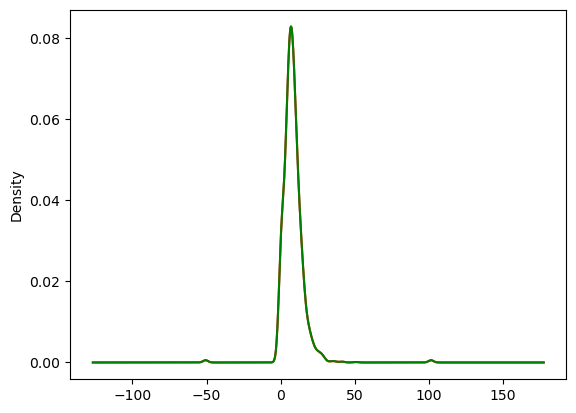

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['MLTV'].plot.density(color='red')
new_df['MLTV'].plot.density(color= 'green')

<AxesSubplot:ylabel='Density'>

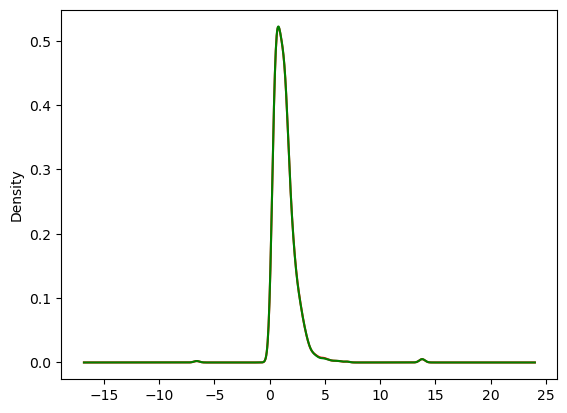

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['MSTV'].plot.density(color='red')
new_df['MSTV'].plot.density(color='green')

<AxesSubplot:ylabel='Density'>

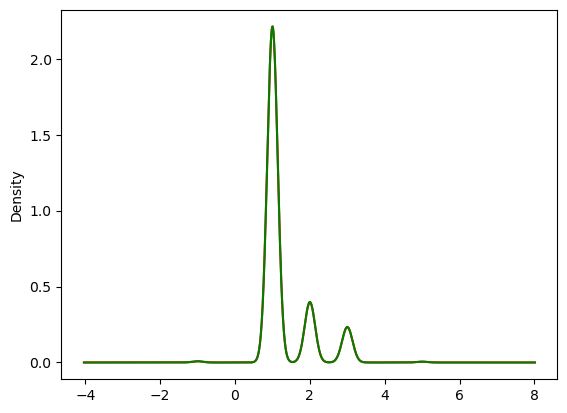

In [39]:
fig = plt.figure()
ax = fig.add_subplot()

df['NSP'].plot.density(color='red')
new_df['NSP'].plot.density(color='green')

<AxesSubplot:ylabel='Density'>

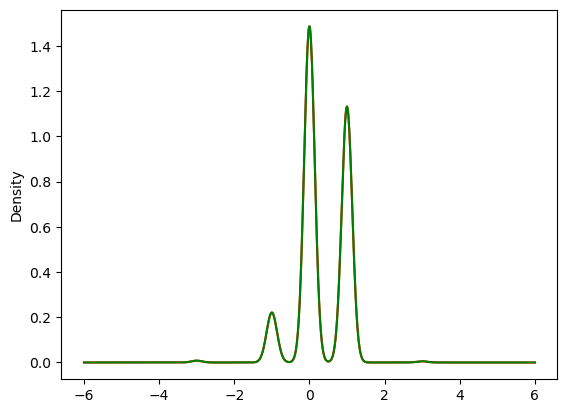

In [40]:
fig = plt.figure()
ax = fig.add_subplot()

df['Tendency'].plot.density(color='red')
new_df['Tendency'].plot.density(color='green')

<AxesSubplot:ylabel='Density'>

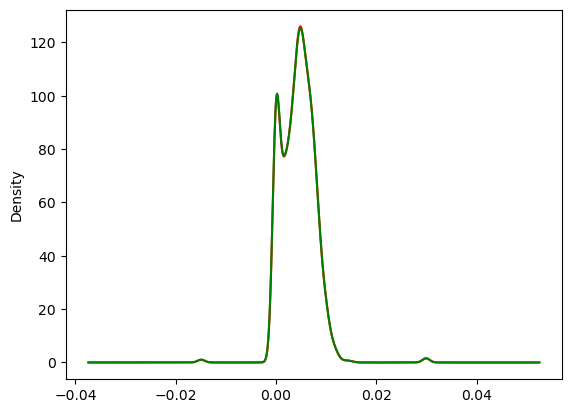

In [41]:
fig = plt.figure()
ax = fig.add_subplot()

df['UC'].plot.density(color='red')
new_df['UC'].plot.density(color='green')

<AxesSubplot:ylabel='Density'>

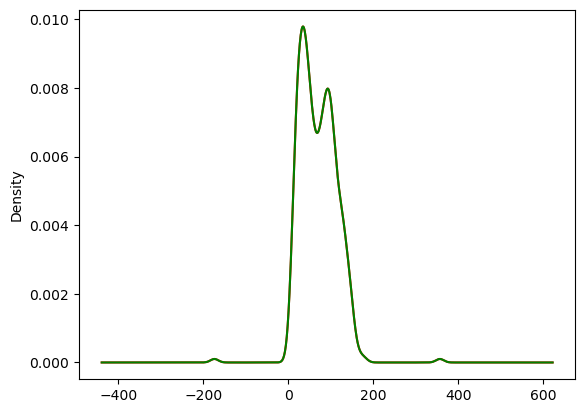

In [42]:
fig = plt.figure()
ax = fig.add_subplot()

df['Width'].plot.density(color='red')
new_df['Width'].plot.density(color='green')

From the previous density plots we can notice that the data distribution shape of every column before removing missing values and after removing missing value are same. So we can keep the new dataset after dropping the missing value rows.

As our missing datas are handled, let's check for Outliers

<AxesSubplot:>

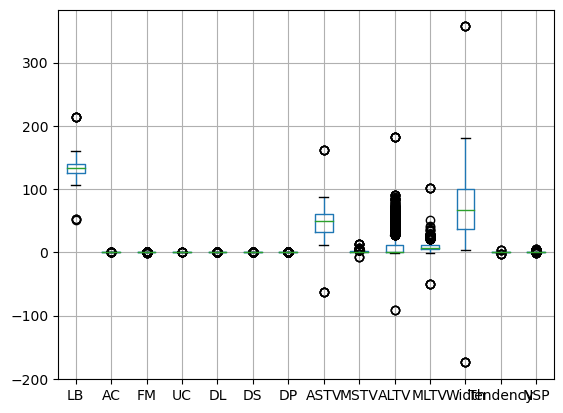

In [43]:
df[cols].boxplot()

<AxesSubplot:>

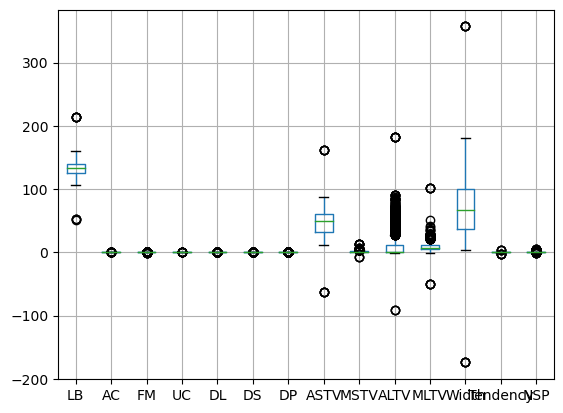

In [44]:
new_df[cols].boxplot()

Now we can see that there are no extra outliers created after removin the data

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

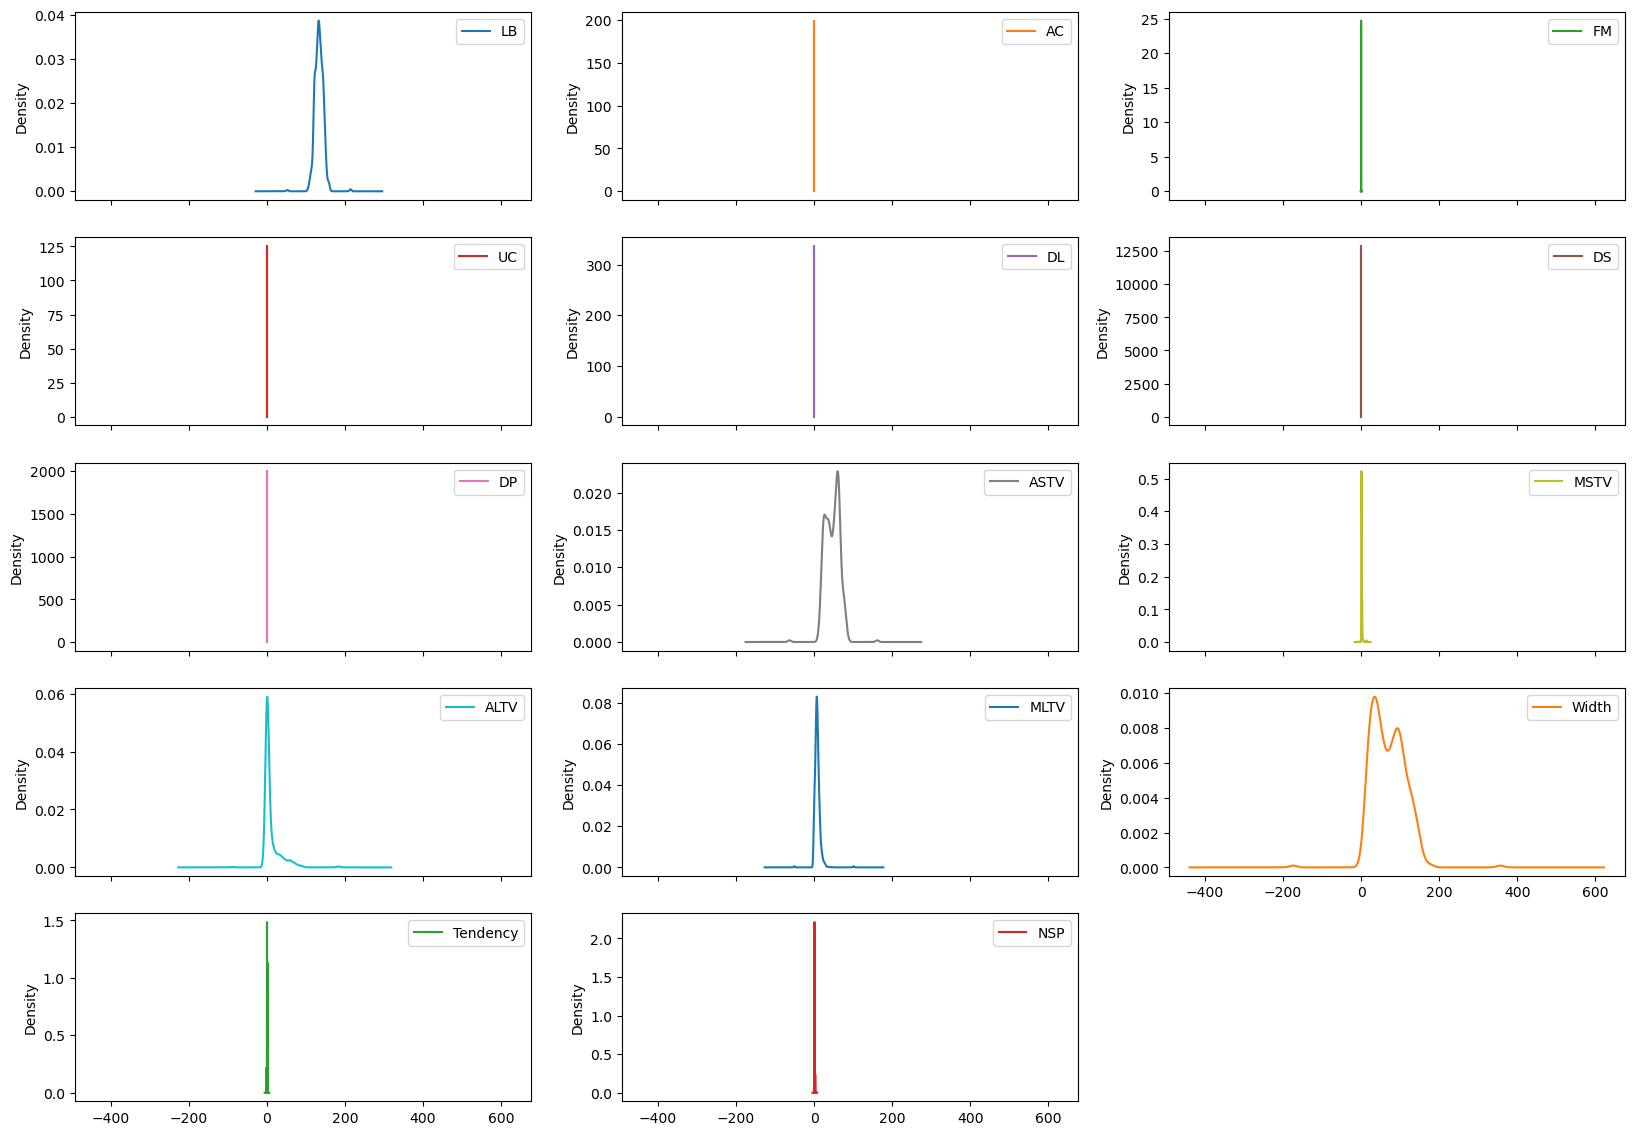

In [45]:
new_df.plot.density(subplots=True, layout=(7,3), figsize = (20,20))

We can see here that some column distribution is similar to a line if it is plotted on a similar plot. It is because the values are not in same format. In some cases the distribution is so wide that we can see the shape of the distribution whereas on some cases the distribution is so narrow that we can not properly see the distribution of data of that column. It can be solved by using standardization.

# Standardization

Let's import the Standardization function which is "StandardScalar" from Sci-kit learn

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler() #storing standardscaler in a variable to use in future

In [48]:
scaler.fit(new_df) #fitting the standardization
df_scaled = scaler.transform(new_df) #transforming the data as per the standardization

In [49]:
scaler.mean_ #mean of each column displayed in arrays

array([1.33343598e+02, 3.20218560e-03, 9.96337575e-03, 4.38754381e-03,
       1.89224763e-03, 2.50898351e-06, 1.75151212e-04, 4.69969290e+01,
       1.36100550e+00, 1.03536469e+01, 8.28488743e+00, 7.04292605e+01,
       3.16371404e-01, 1.30450718e+00])

In [50]:
df_scaled = pd.DataFrame(df_scaled, columns = new_df.columns) # storing the new scaled arrays( standardized values in a new dataframe with the same column names)

In [51]:
new_df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [52]:
df_scaled.head()

LB        AC        FM        UC        DL        DS       DP  \
0 -1.184258 -0.740798 -0.146835 -1.310156 -0.565300 -0.017731 -0.20862   
1 -0.119246  0.735064 -0.146835  0.594840  0.387636 -0.017731 -0.20862   
2 -0.030495  0.027778 -0.146835  1.169977  0.427209 -0.017731 -0.20862   
3  0.058256 -0.148375 -0.146835  1.001632  0.199733 -0.017731 -0.20862   
4 -0.123840  0.766312 -0.146835  1.121506 -0.565300 -0.017731 -0.20862   

       ASTV      MSTV      ALTV      MLTV     Width  Tendency       NSP  
0  1.379967 -0.734092  1.534346 -0.757287 -0.149791  1.059005  1.079177  
1 -1.591918  0.630065 -0.486611  0.272180  1.387896 -0.490142 -0.472495  
2 -1.644988  0.630065 -0.486611  0.658230  1.387896 -0.490142 -0.472495  
3 -1.644988  0.885845 -0.486611  1.893590  1.085018  1.059120 -0.472495  
4 -1.644988  0.885845 -0.486611  1.494672  1.085018  1.059120 -0.472495

In [53]:
np.round(df_scaled.describe(), 3) #checking for scaled values.
#if the mean and standard deviation are 0 and 1 respectively after standardization then the scaling is correct.

LB        AC        FM        UC        DL        DS        DP  \
count  2105.000  2105.000  2105.000  2105.000  2105.000  2105.000  2105.000   
mean      0.000    -0.000    -0.000     0.000     0.000     0.000     0.000   
std       1.000     1.000     1.000     1.000     1.000     1.000     1.000   
min      -7.233    -5.202    -7.230    -5.767    -5.164    -9.581    -6.578   
25%      -0.652    -0.741    -0.147    -0.761    -0.565    -0.018    -0.209   
50%      -0.030    -0.363    -0.147     0.029    -0.565    -0.018    -0.209   
75%       0.591     0.566    -0.109     0.642     0.417    -0.018    -0.209   
max       7.158     8.181    14.020     7.649     8.627    19.108    12.530   

           ASTV      MSTV      ALTV      MLTV     Width  Tendency       NSP  
count  2105.000  2105.000  2105.000  2105.000  2105.000  2105.000  2105.000  
mean     -0.000     0.000     0.000     0.000    -0.000    -0.000    -0.000  
std       1.000     1.000     1.000     1.000     1.000     1.000     1.000  
min      -5.837    -6.788    -4.764    -7.590    -5.695    -5.138    -3.616  
25%      -0.796    -0.564    -0.487    -0.474    -0.779    -0.490    -0.472  
50%       0.106    -0.137    -0.487    -0.114    -0.080    -0.490    -0.472  
75%       0.743     0.289     0.030     0.337     0.689     1.059    -0.472  
max       6.103    10.605     8.067    11.982     6.677     4.158     5.734

Let's compare the data distribution shape of the dataset before and after scaling 

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

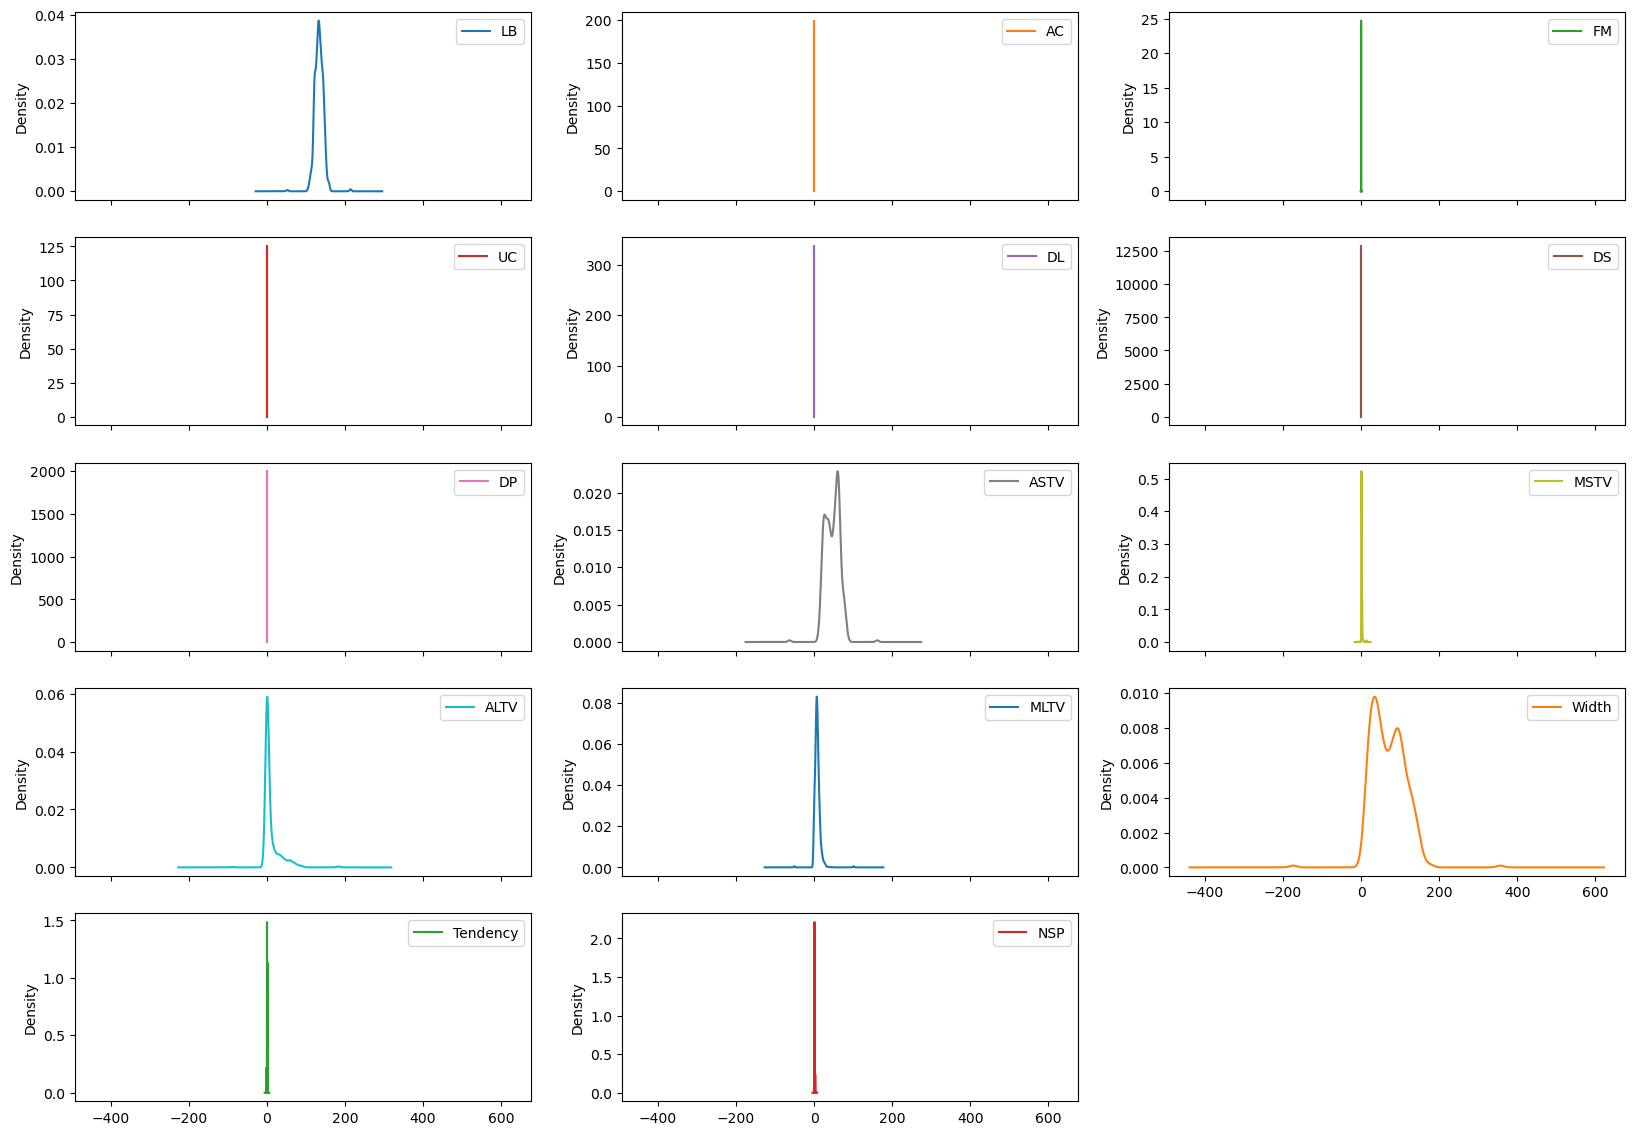

In [54]:
new_df.plot.density(subplots = True, layout = (7,3), figsize = (20,20))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

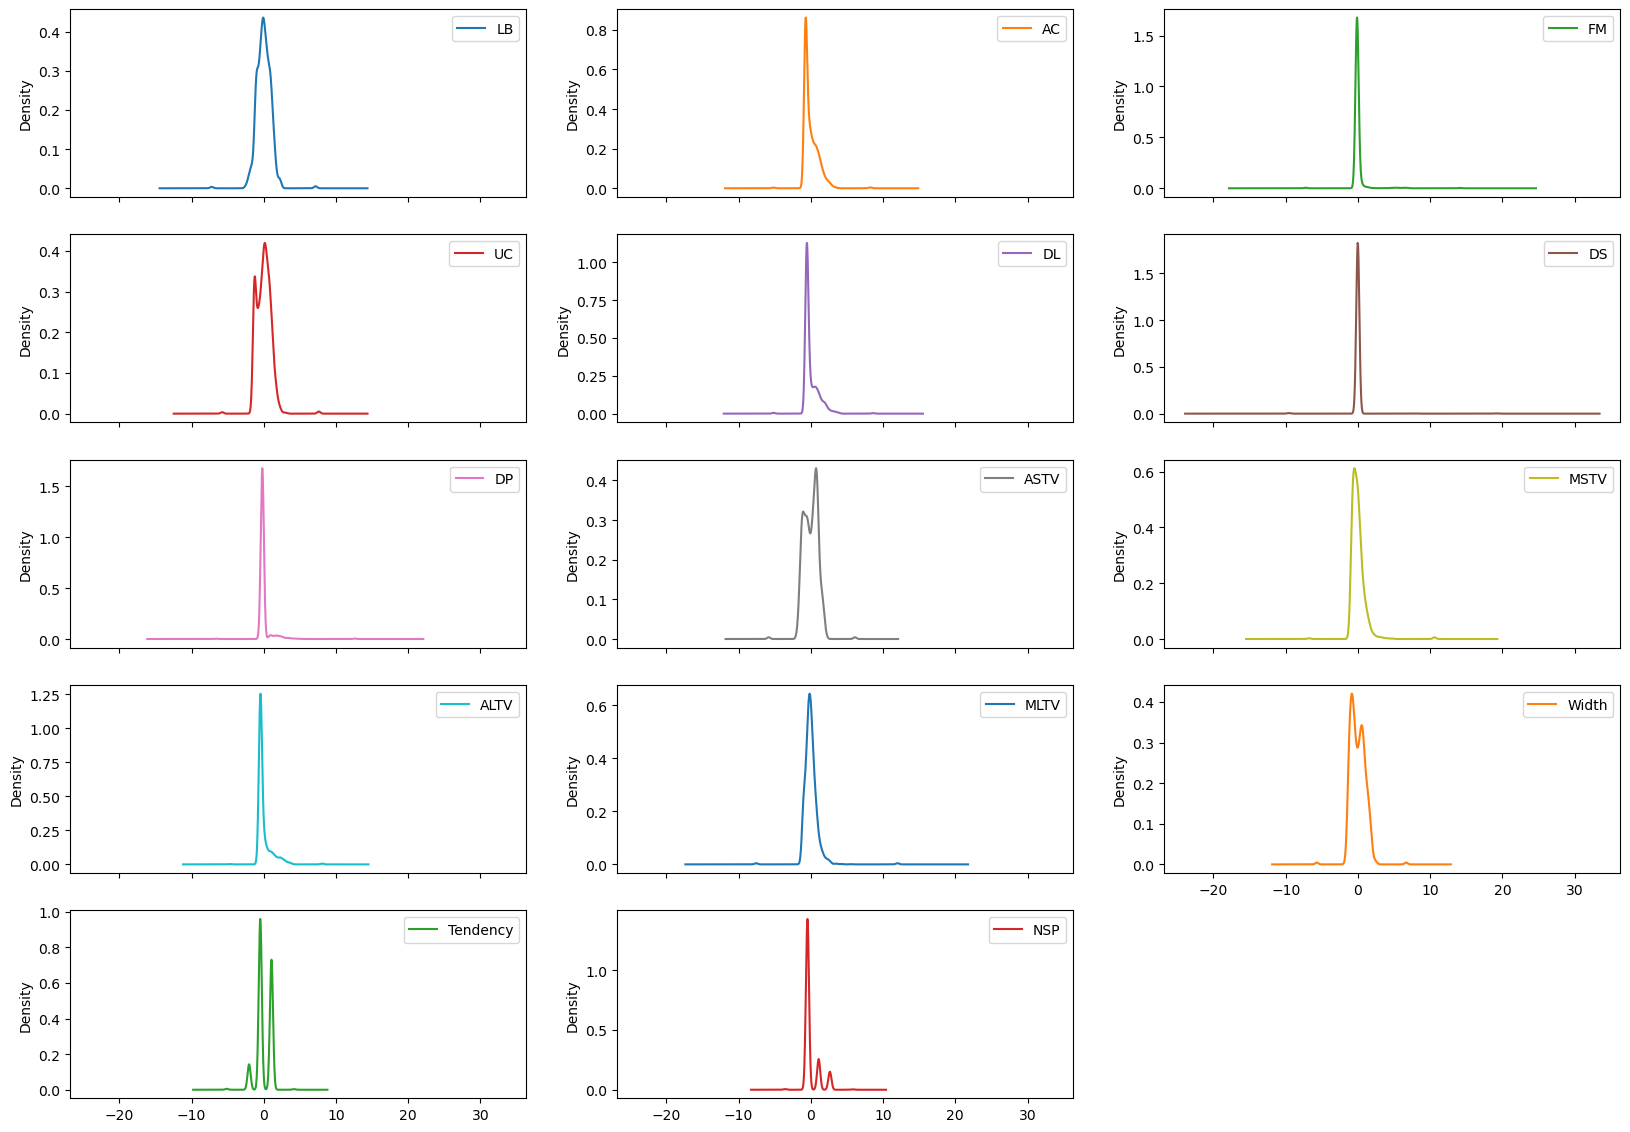

In [55]:
df_scaled.plot.density(subplots = True, layout = (7,3), figsize=(20,20))

We can see the shapes of the distribution of the data for the columns which were not clearly visible(shrinked) is now wider and clearly visible. It is possible because of standardization where we used z-score normalization to scale every column's data into a single format.

Let's plot boxplot for both the dataframes

<AxesSubplot:>

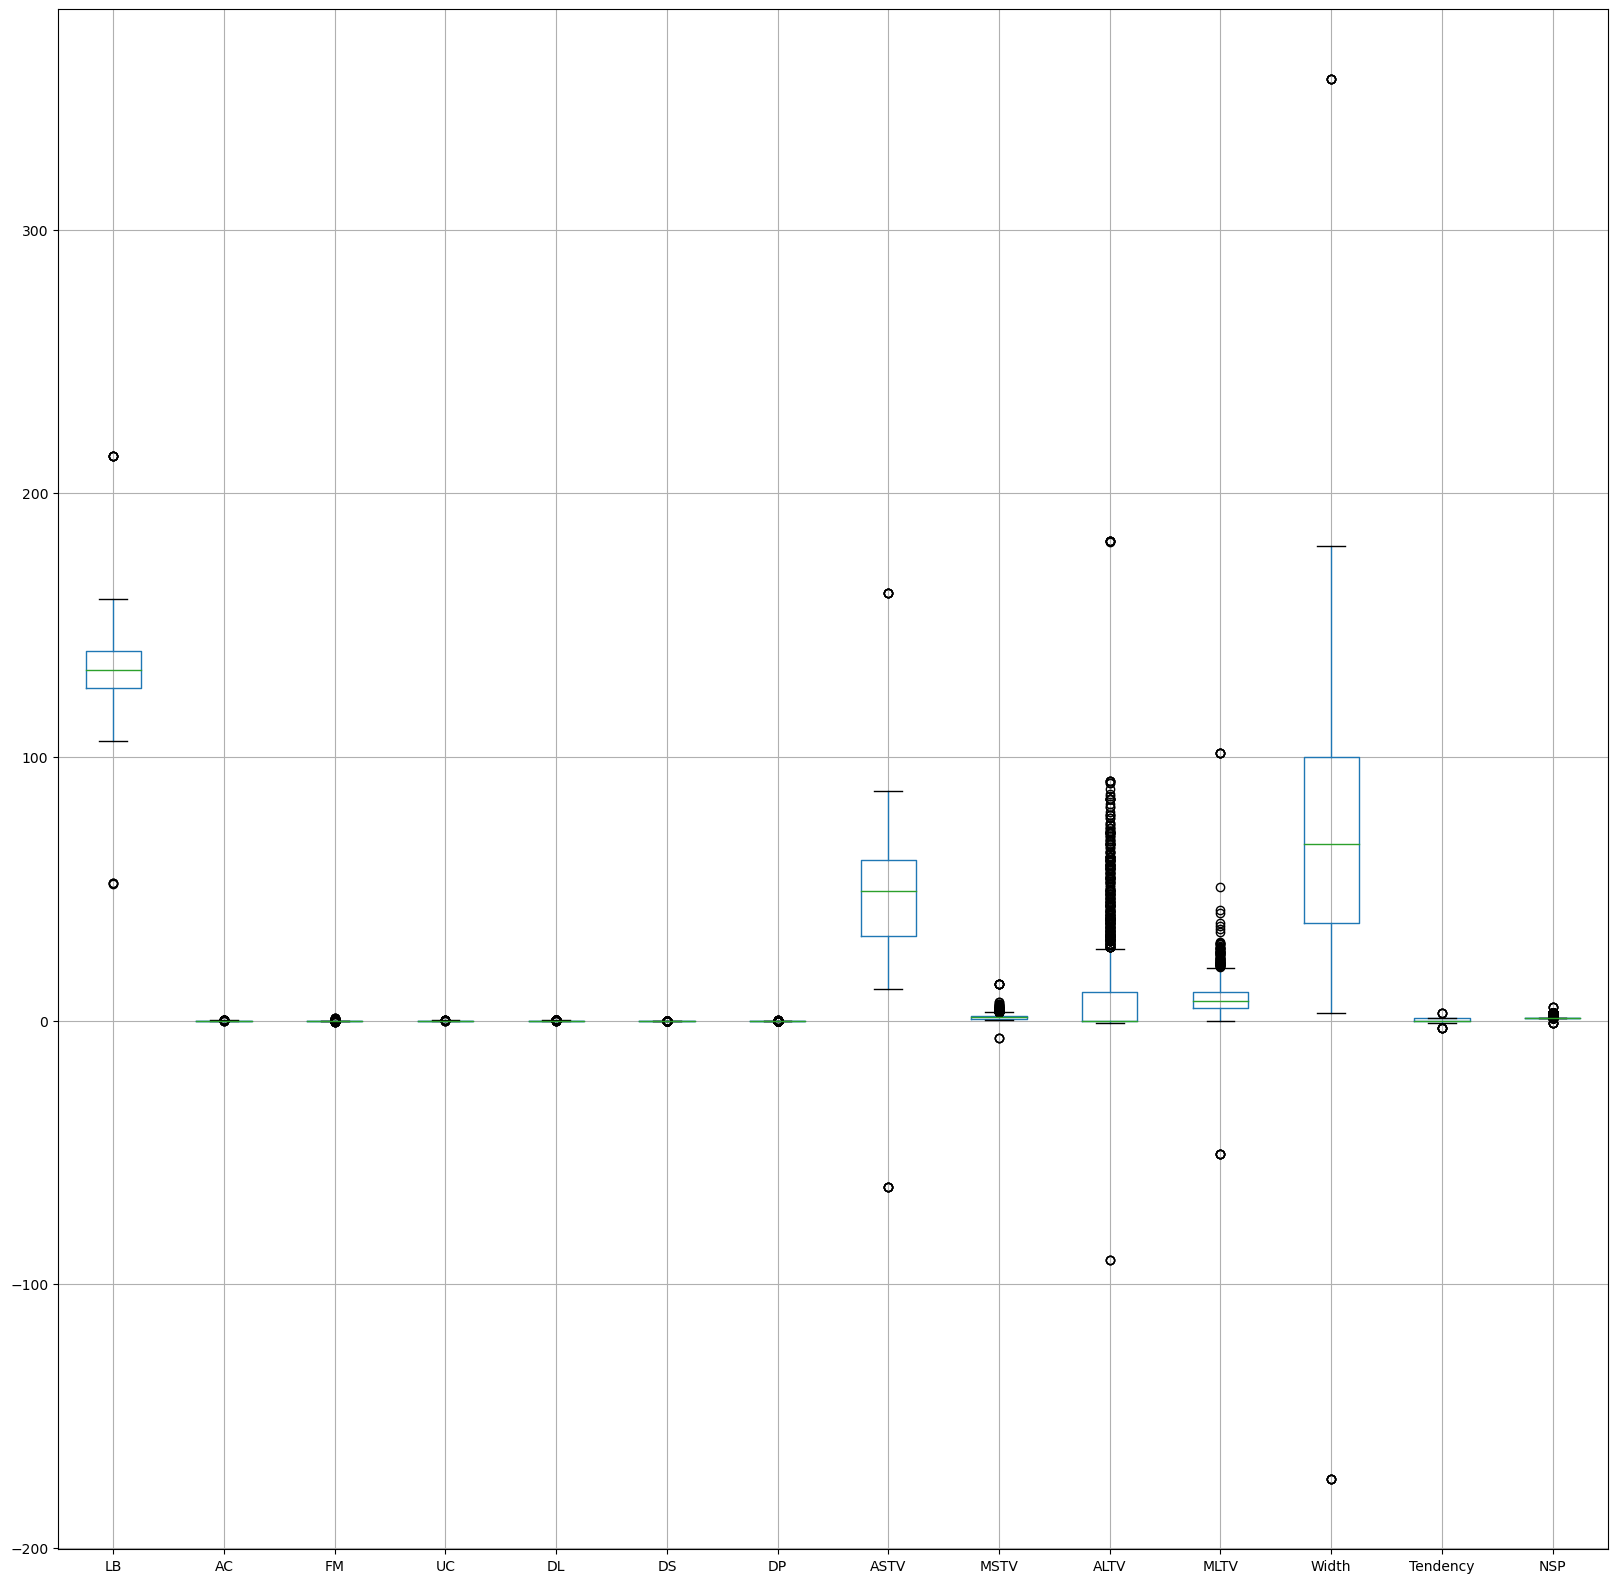

In [56]:
df.boxplot(figsize = (20,20))

<AxesSubplot:>

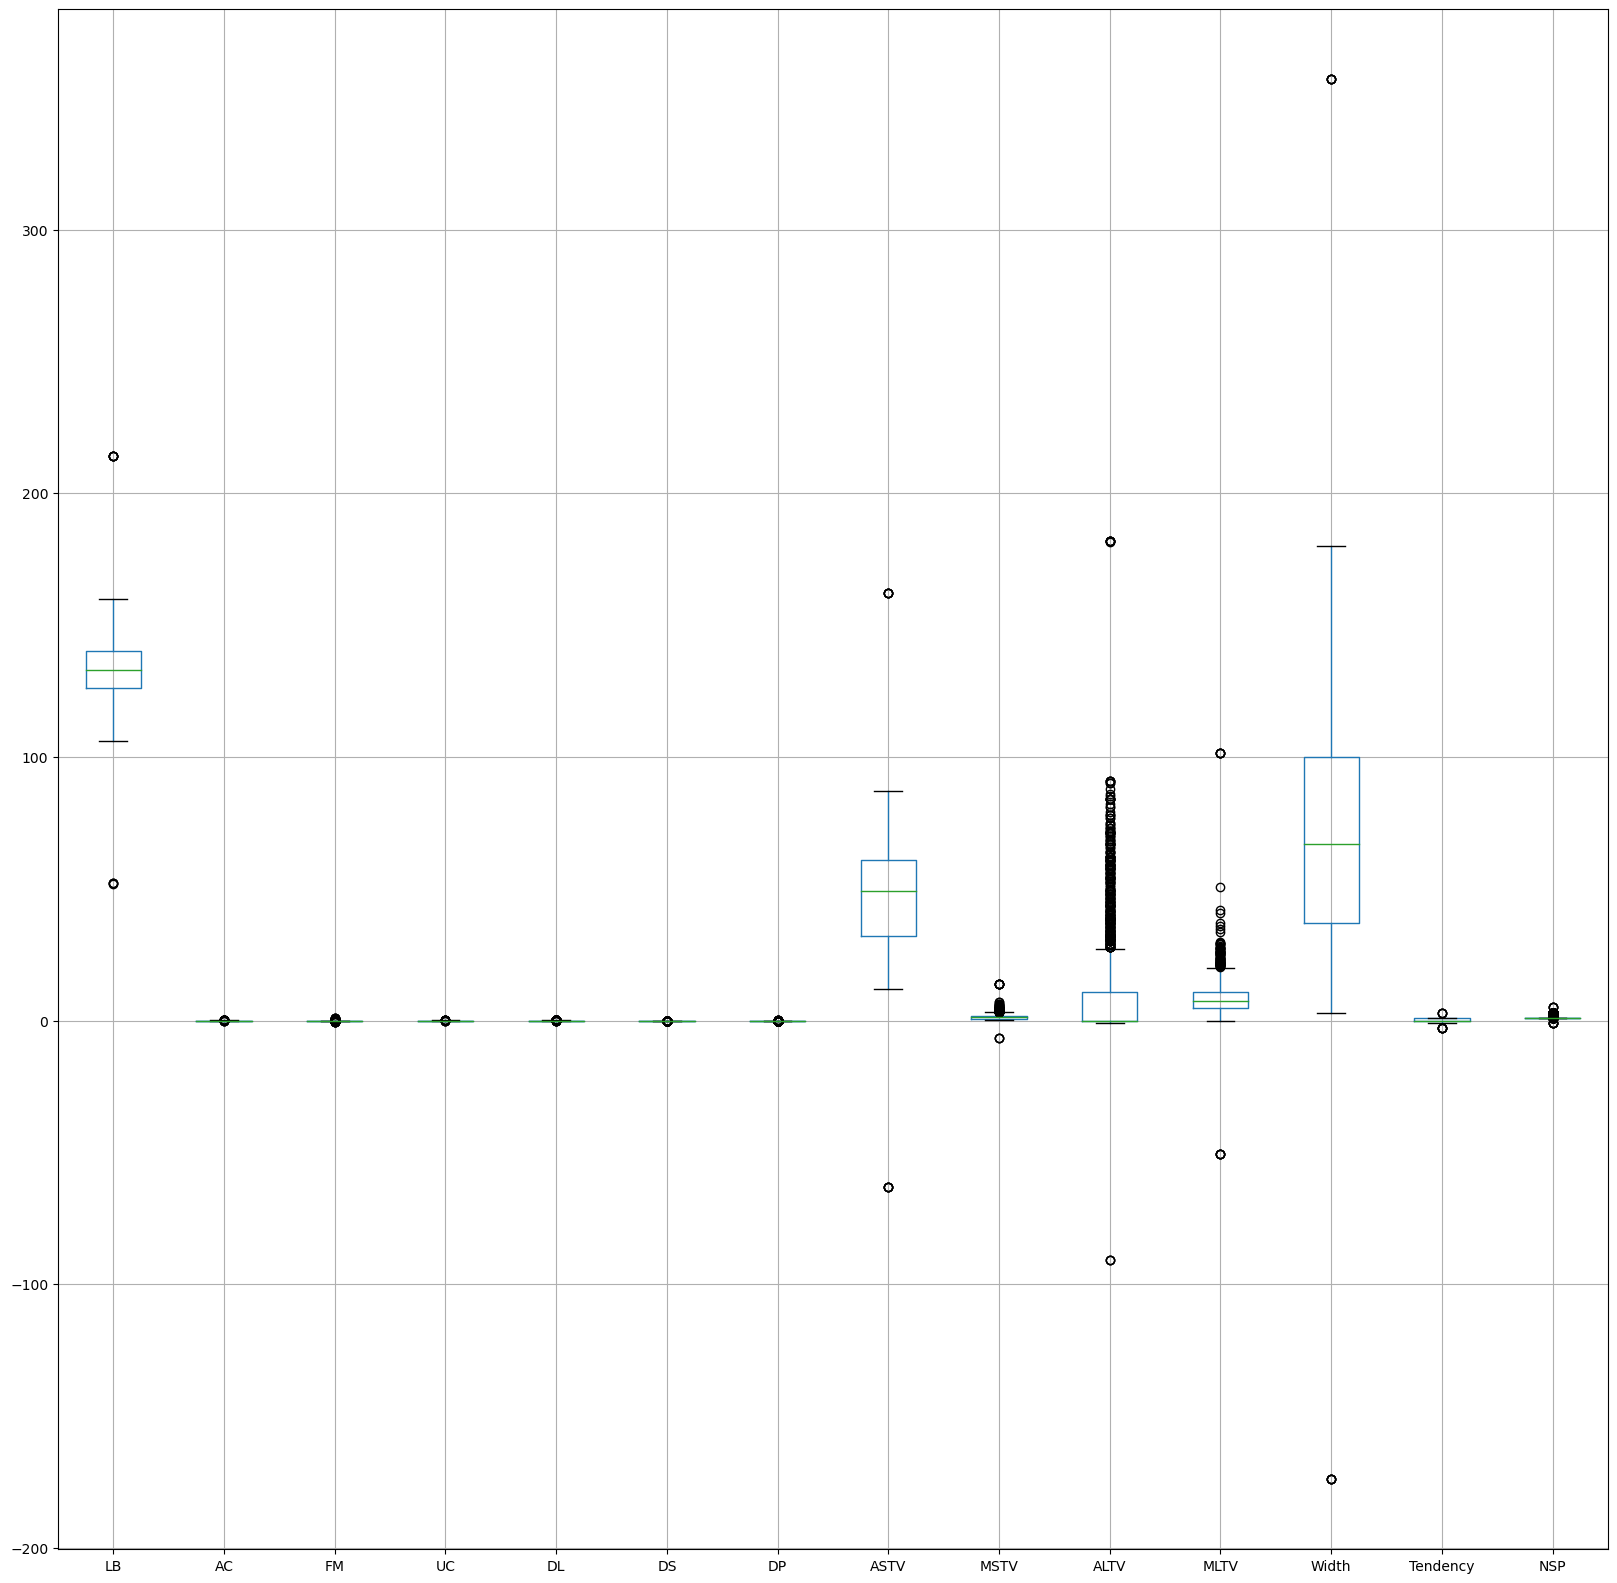

In [57]:
new_df.boxplot(figsize =(20,20))

<AxesSubplot:>

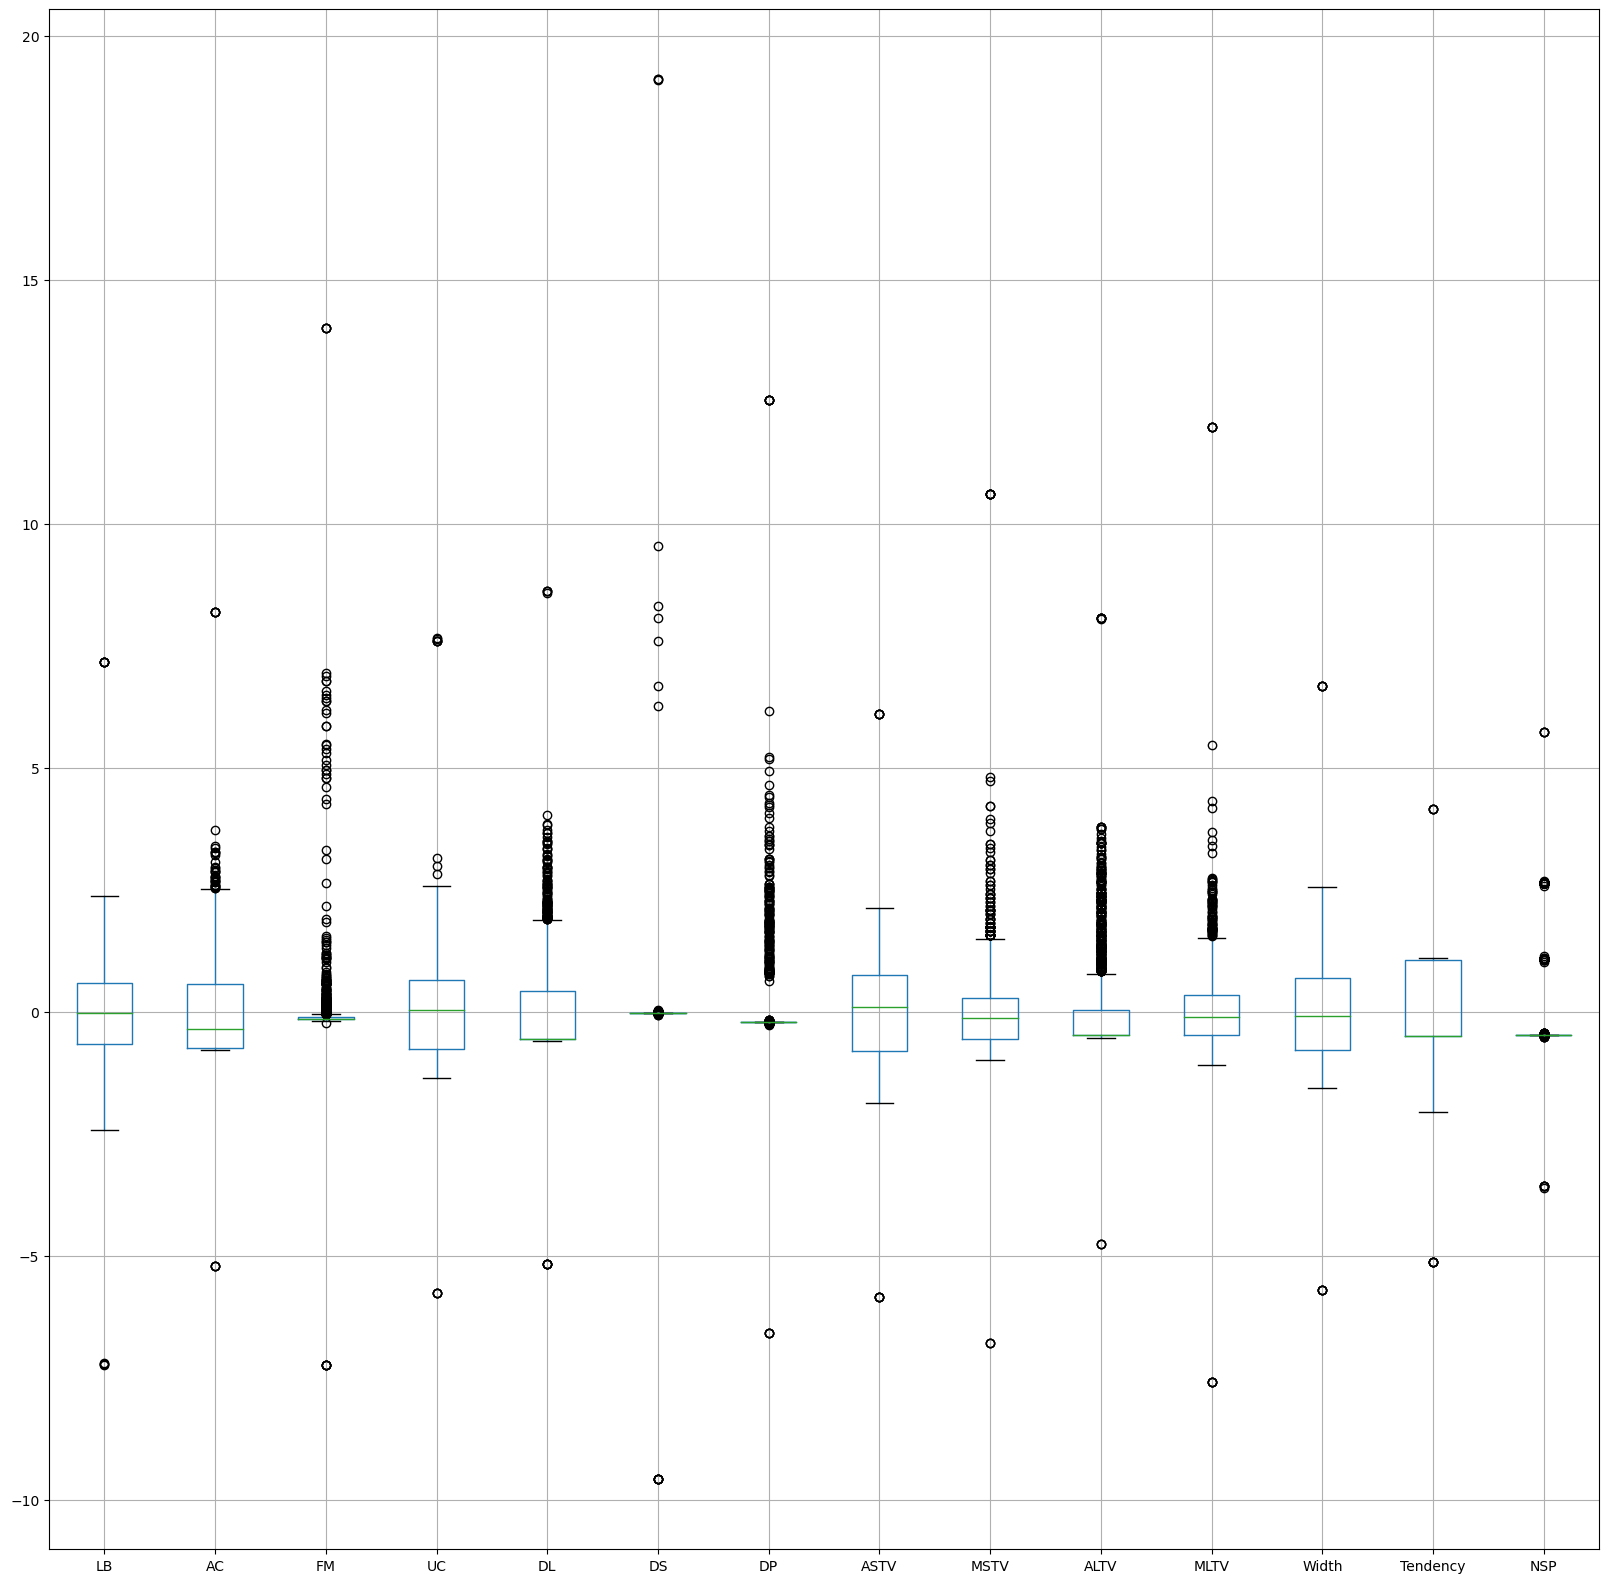

In [58]:
df_scaled.boxplot(figsize =(20,20))

We can see that boxplot is more informative.

But we can notice that there are outliers in our data by observing the boxplot. Let's handle them.

# Handling Outliers

In [59]:
df_scaled.skew() #checking skewness of each column to see it the datas are normally distributed or not.

LB          0.320747
AC          1.864886
FM          6.718356
UC          0.977332
DL          2.011970
DS          8.418984
DP          6.422466
ASTV        0.055370
MSTV        4.175994
ALTV        2.968950
MLTV        3.541448
Width       0.495246
Tendency   -0.496789
NSP         1.810900
dtype: float64

We can see that ASTV is the only column which is close to normal distribution.

Let's handle it's outlier.

# Handling Outliers of ASTV column

As the data is normally distributed we can handle outliers by using the Z-score method.

<AxesSubplot:>

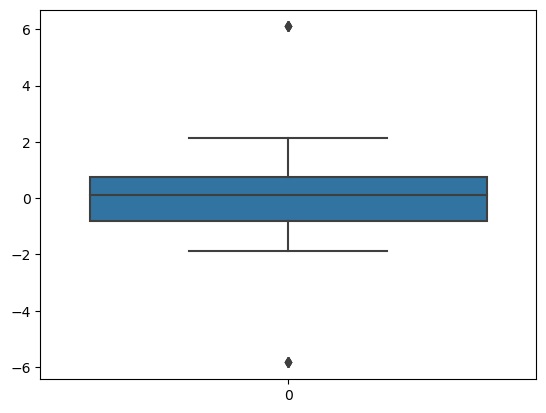

In [60]:
import seaborn as sns
sns.boxplot(data = df_scaled['ASTV']) #It has very few outliers

Skewness  0.05536993063749139


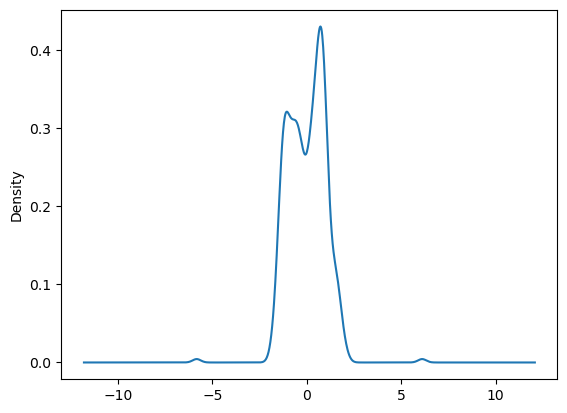

In [61]:
df_scaled['ASTV'].plot.density()
print("Skewness ", df_scaled['ASTV'].skew()) #shape of the data

# Z-score transformation

In [62]:
print("Mean is", df_scaled['ASTV'].mean())
print("Standard deviation is", df_scaled['ASTV'].std())
print("Minimum value is", df_scaled['ASTV'].min())
print("Maximum value is", df_scaled['ASTV'].max())

Mean is -1.73205340278813e-16
Standard deviation is 1.0002376143552631
Minimum value is -5.8374682583986885
Maximum value is 6.1031410827124875


In [63]:
Highest_allowed = (df_scaled['ASTV'].mean()) + (3 * df_scaled['ASTV'].std()) #highest boundary of the data

In [64]:
print(Highest_allowed)

3.0007128430657897


In [65]:
Lowest_allowed = (df_scaled['ASTV'].mean()) - (3 * df_scaled['ASTV'].std()) #lowest boundry of the data

In [66]:
print(Lowest_allowed)

-3.0007128430657897


In [67]:
df_scaled[(df_scaled['ASTV'] > Highest_allowed) | (df_scaled['ASTV']< Lowest_allowed)]

LB        AC        FM        UC        DL        DS       DP  \
128   2.188281 -0.740798 -0.146835 -1.310156 -0.565300 -0.017731 -0.20862   
228  -0.918005  0.103514 -0.066156 -1.310156 -0.565300 -0.017731 -0.20862   
341   0.502011 -0.742418 -0.049665 -1.310156 -0.565300 -0.017731 -0.20862   
500  -0.474250  1.168485  0.055881 -0.077936 -0.565300 -0.017731 -0.20862   
1004  0.502011  0.719427 -0.146835  0.036138 -0.565300 -0.017731 -0.20862   
1017 -7.233306  1.453497 -0.146835  0.308316  0.244308  0.014477 -0.20862   
1185  0.413260  1.977958 -0.146835  0.284972 -0.565300 -0.017731 -0.20862   
1564 -0.119246 -0.740798 -0.189406 -0.416120 -0.543051 -0.017731 -0.20862   
1920 -0.030495 -0.740798 -0.094342  0.551159  0.498797 -0.017731 -0.20862   
1987 -0.740503 -0.464074 -0.129207  1.190151  2.293507 -0.017731 -0.20862   

          ASTV      MSTV      ALTV      MLTV     Width  Tendency       NSP  
128  -5.837468 -0.648832  0.970358  0.040550  0.502561  1.059120 -0.472495  
228   6.103141 -0.563572 -0.486611  0.040550  0.013297  1.059120 -0.498222  
341   6.103141 -0.989871  2.286330 -0.525657 -1.384600 -0.490142  1.079177  
500  -5.837468 -0.222533 -0.486611  0.568152  1.224808 -0.490142 -0.472495  
1004  6.103141 -0.478312 -0.486611 -0.088134 -0.850751 -2.039405 -0.472495  
1017 -5.837468  0.971104 -0.486611 -0.564262  0.642351 -0.490142 -0.472495  
1185 -5.837468 -0.137273 -0.486611 -0.538525 -0.522563 -0.490142 -0.472495  
1564 -5.837468 -0.222533 -0.486611  0.696835 -0.429370  1.059120 -0.472495  
1920  6.103141  0.630065 -0.486611 -0.869628  0.642351 -0.490142 -0.472495  
1987  6.103141 -0.222533 -0.486611 -0.538525  0.688947 -0.490142 -0.472495

In [68]:
df_scaled.shape #dimension of the dataset before removing outliers from ASTV column

(2105, 14)

In [69]:
new_df_scaled = df_scaled[(df_scaled['ASTV'] < Highest_allowed) & (df_scaled['ASTV'] > Lowest_allowed)]

In [70]:
new_df_scaled.shape #dimension of the dataset after removing outliers from ASTV column

(2095, 14)

<AxesSubplot:>

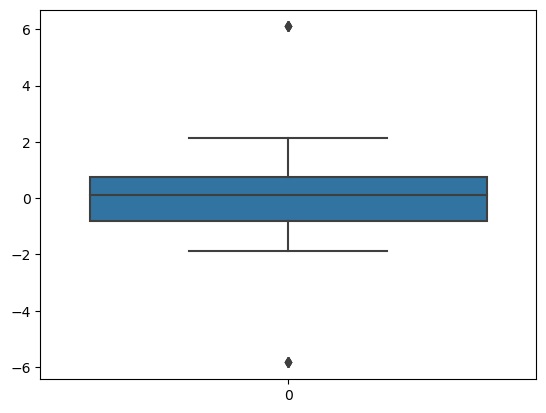

In [71]:
sns.boxplot(data=df_scaled['ASTV']) #boxplot before removing ASTV outliers

<AxesSubplot:>

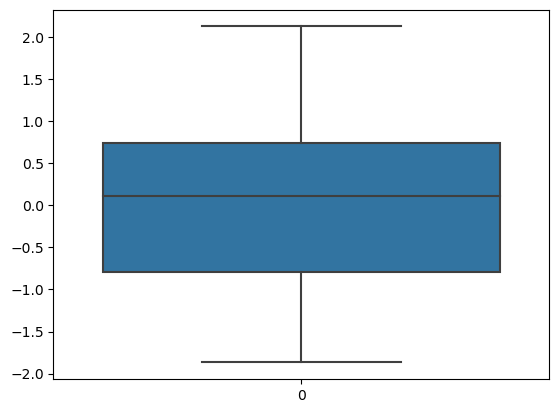

In [72]:
sns.boxplot(data = new_df_scaled['ASTV']) #boxplot after removing ASTV outliers

<AxesSubplot:ylabel='Density'>

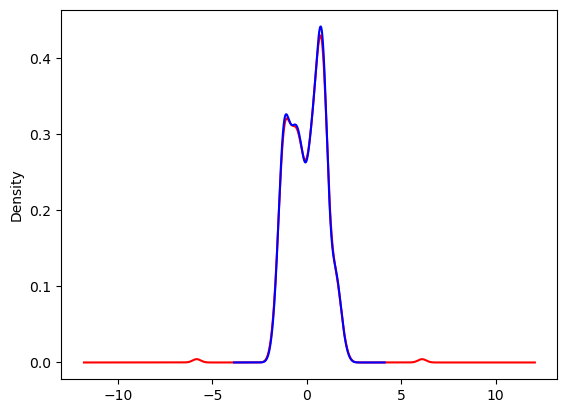

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_scaled['ASTV'].plot.density(color='red')
new_df_scaled['ASTV'].plot.density(color = 'blue')

#plotting to check if the data distribution is changed after removing outliers

Outliers have been handled for ASTV column.

<AxesSubplot:>

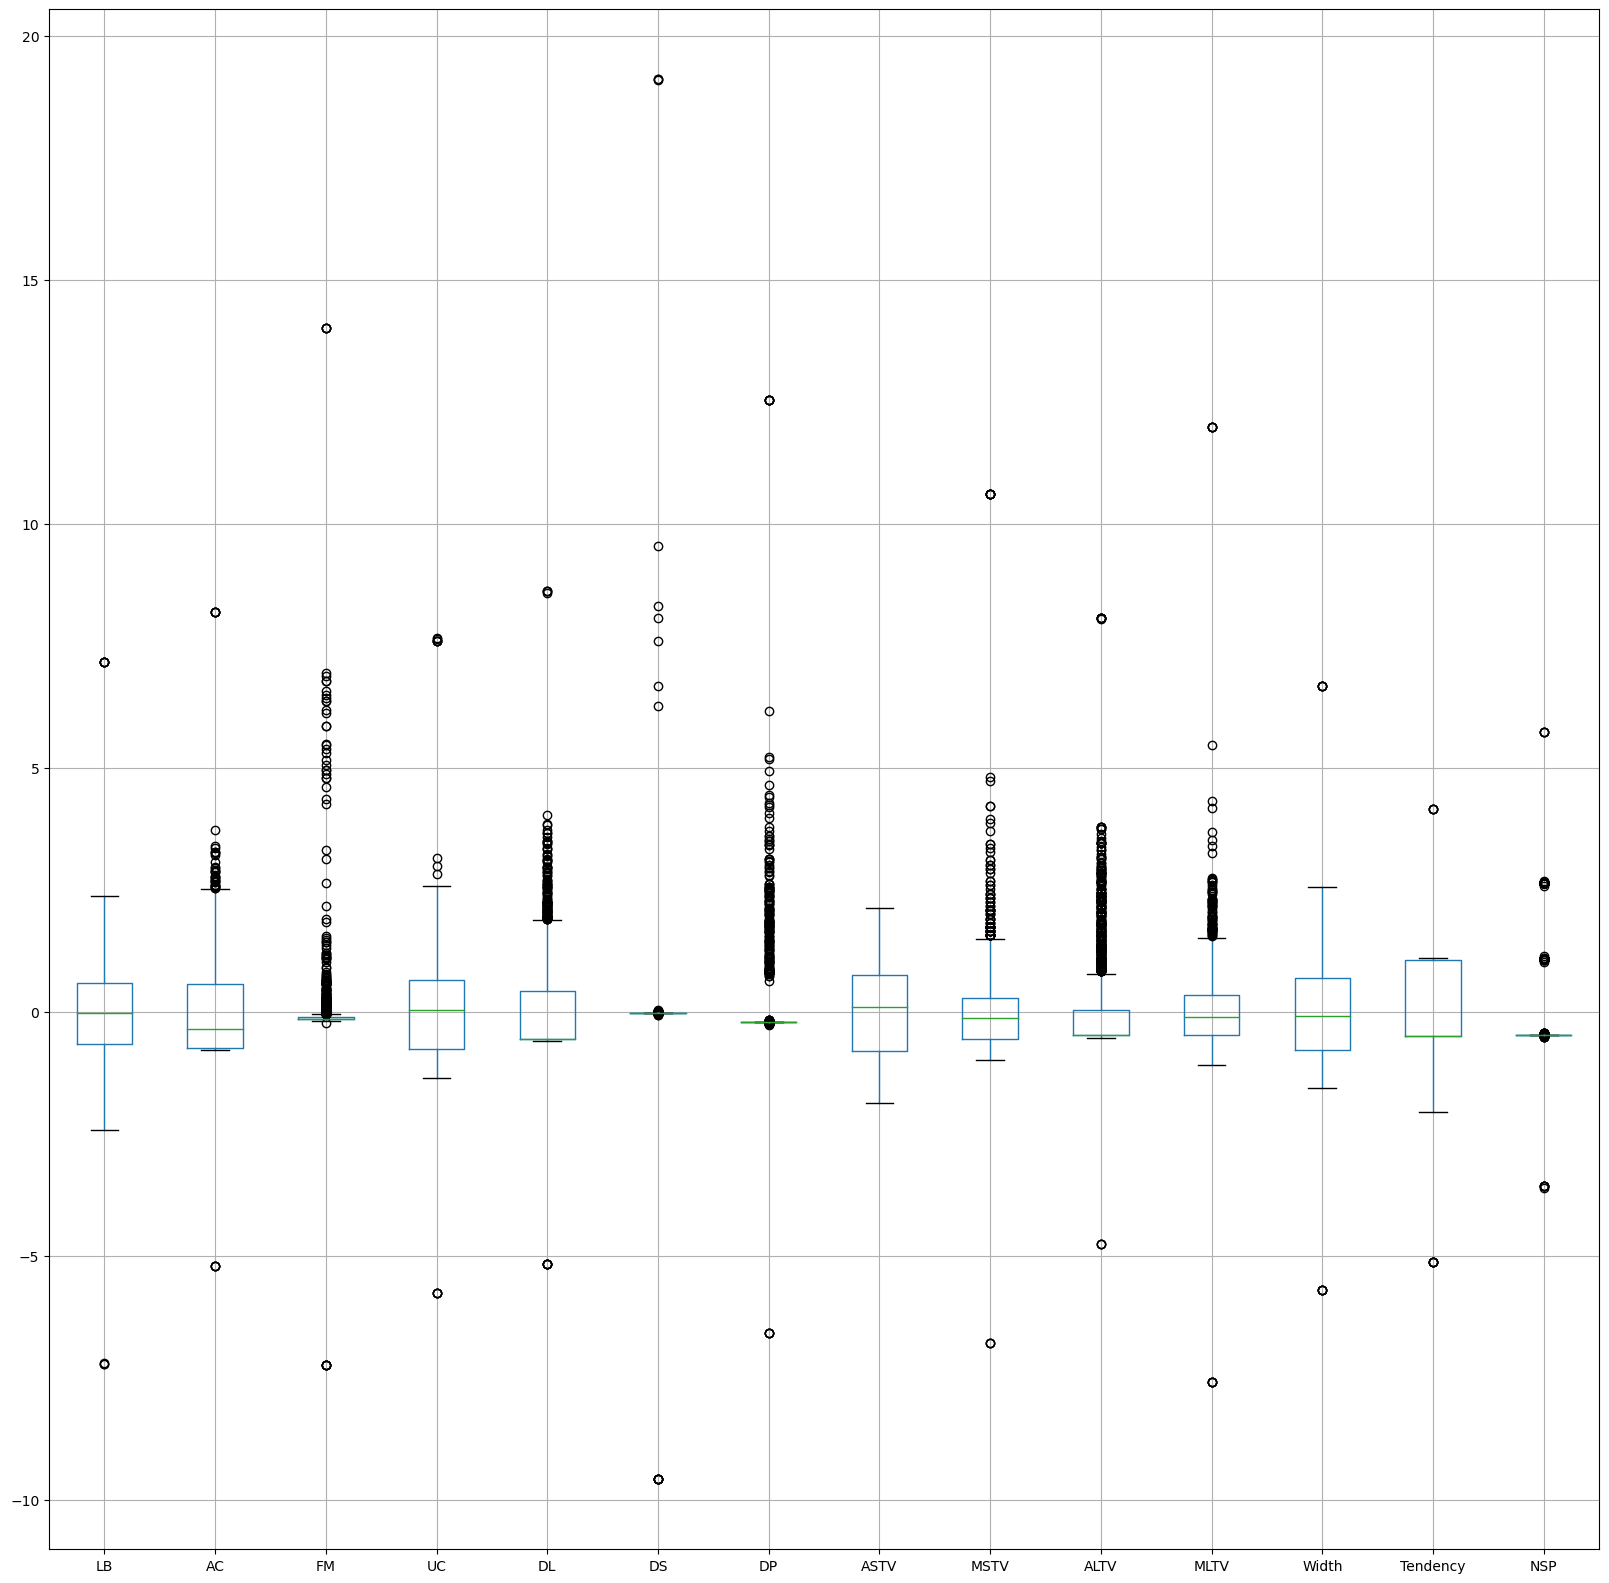

In [74]:
new_df_scaled.boxplot(figsize = (20,20))

From the above boxplot all of the columns except ASTV are skewed. So we are going to handle outliers for those columns by using IQR method, but there are some columns where removing the outliers will be bad for our dataset and there are some columns from which we can remove outliers. So, let's handle the outliers by performing Trimming and Capping.

Trimming will be performed where the number of outliers is very less and Capping will be performed where the number of outliers are very high.

Let's separate the columns that we will use trimming on and the columns we would be applying capping.

But there's one obstacle, FM, DS, NSP's boxplot are not clearly visible. Let's handle outliers in them after we handle outliers on the clearly visible boxplots.

Since, we are done with ASTV column's outliers,
we will be focusing to perform IQR on LB, AC, UC, DL, MSTV, ALTV, MLTV, Width, Tendency.

In [75]:
def IQR_OUTLIERS(X): #creating a fucntion to perform IQR outlier removing method.
    for i in X.columns:
        percentile75 = X[i].quantile(0.75)
        percentile25 = X[i].quantile(0.25)
        IQR = percentile75 - percentile25
        UL = percentile75 + 1.5*IQR
        LL = percentile25 - 1.5*IQR
        if len(X[(X[i] < LL) | (X[i] > UL)]) < 20:
            X = X[(X[i] <UL) & (X[i] > LL)]
        else:
            X.loc[X[i] < LL, i] = LL
            X.loc[X[i] > UL, i] = UL
    return X       

In [76]:
X = new_df_scaled.drop(['ASTV', 'FM', 'DS', 'DP', 'NSP'], axis =1)  
# storing 'ASTV' , 'FM' , 'DS' , 'DP' , 'NSP' columns to a new dataframe to perform IQR on it separately

In [77]:
X.shape

(2095, 9)

In [78]:
X = IQR_OUTLIERS(X) #applied function on the new dataframe

C:\Users\DELL\AppData\Local\Temp\ipykernel_3816\78475391.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[i] < LL, i] = LL
C:\Users\DELL\AppData\Local\Temp\ipykernel_3816\78475391.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[i] > UL, i] = UL


<AxesSubplot:>

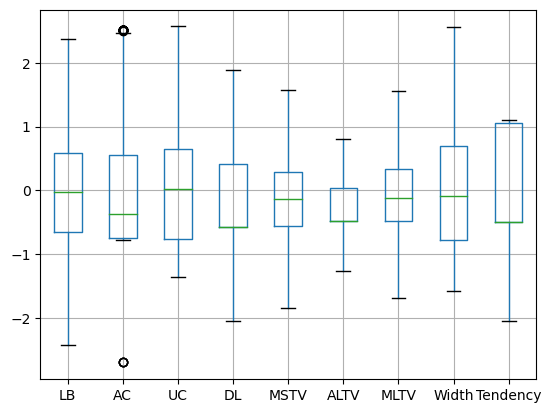

In [79]:
X.boxplot() #boxplot to confirm if all outliers are removed or not

2.5015255139836556 -2.6861923402266816


<AxesSubplot:>

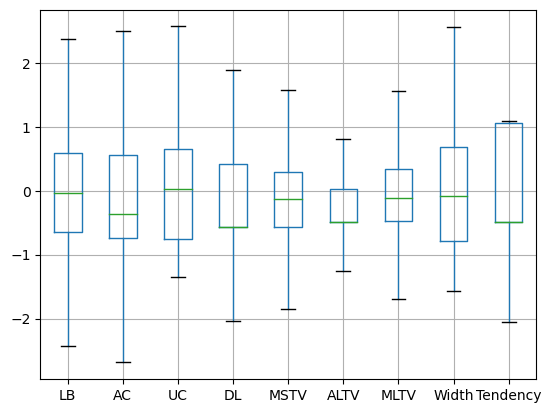

In [80]:
#again separately performing IQR method on 'AC' column to remove the remaining outliers
percentile75 = X['AC'].quantile(0.75)
percentile25 = X['AC'].quantile(0.25)
IQR = percentile75 - percentile25
UL = percentile75 + 1.5*IQR
LL = percentile25 - 1.5*IQR
print(UL,LL)
X[(X['AC'] < LL) | (X['AC'] > UL)]
X.loc[X['AC'] < LL, 'AC'] = LL
X.loc[X['AC'] > UL, 'AC'] = UL
X.boxplot() #checking for outliers again

As we can see there are no outliers remaining. Now, let's remove the outliers from FM , DS, DP, NSP column

In [81]:
Y = new_df_scaled.drop(columns=['LB' , 'AC' , 'UC' , 'DL' , 'MSTV' , 'ALTV' , 'MLTV' , 'Width' , 'Tendency' , 'ASTV'] , axis = 1) #storing the other columns in the new variable to handle outliers in them.

<AxesSubplot:>

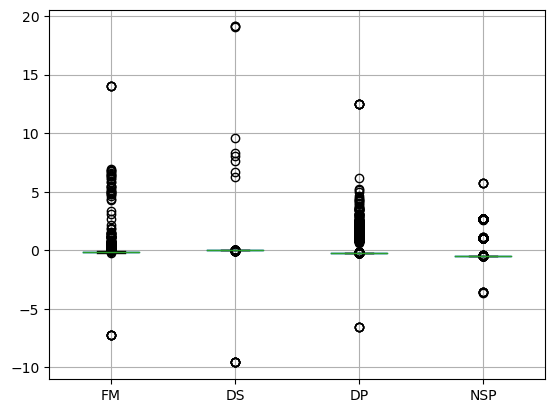

In [82]:
Y.boxplot() #data when there were outliers

In [83]:
Y = IQR_OUTLIERS(Y) #same function

<AxesSubplot:>

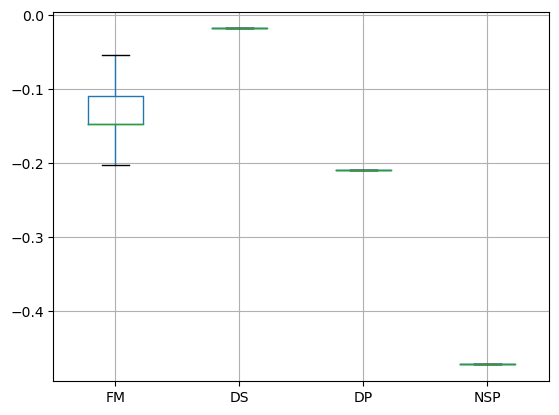

In [84]:
Y.boxplot() #data when the outliers are handled

As we can notice, every possible outlier is handled

In [85]:
final_df = pd.concat([X,Y], axis = 1) #merging the outliers free dataframes and making them one
final_df['ASTV'] = new_df_scaled['ASTV']

In [86]:
final_df.shape

(2095, 14)

<AxesSubplot:>

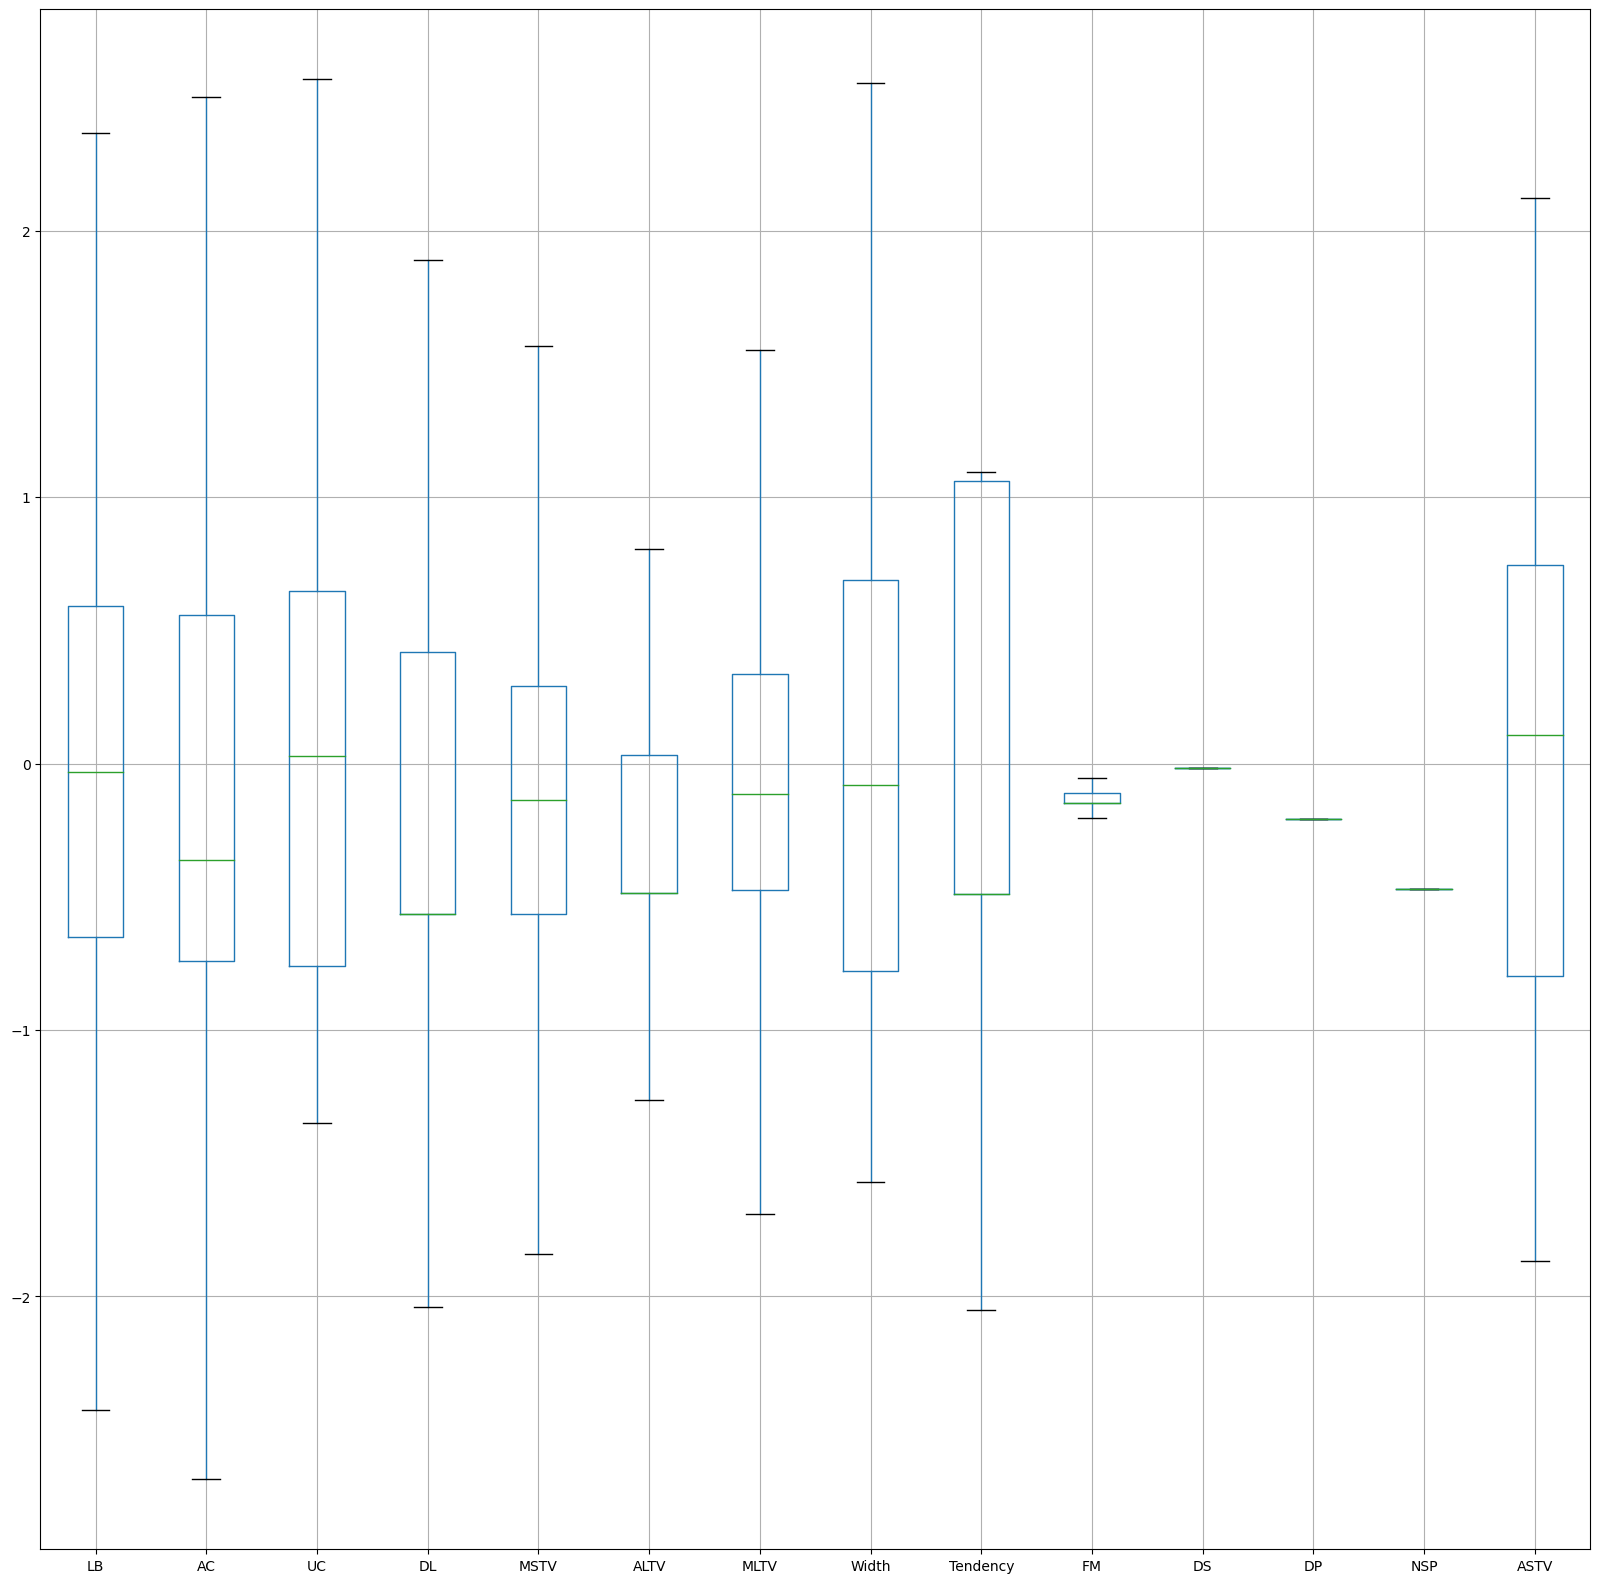

In [87]:
final_df.boxplot(figsize = (20,20))

In [88]:
final_df.fillna(final_df.mean() + 1 , inplace = True) # we got some columns where datas are missing , so let's fill those datas instead of removing them as the number of datas missing now is high 

# EDA

<Figure size 2000x2000 with 0 Axes>

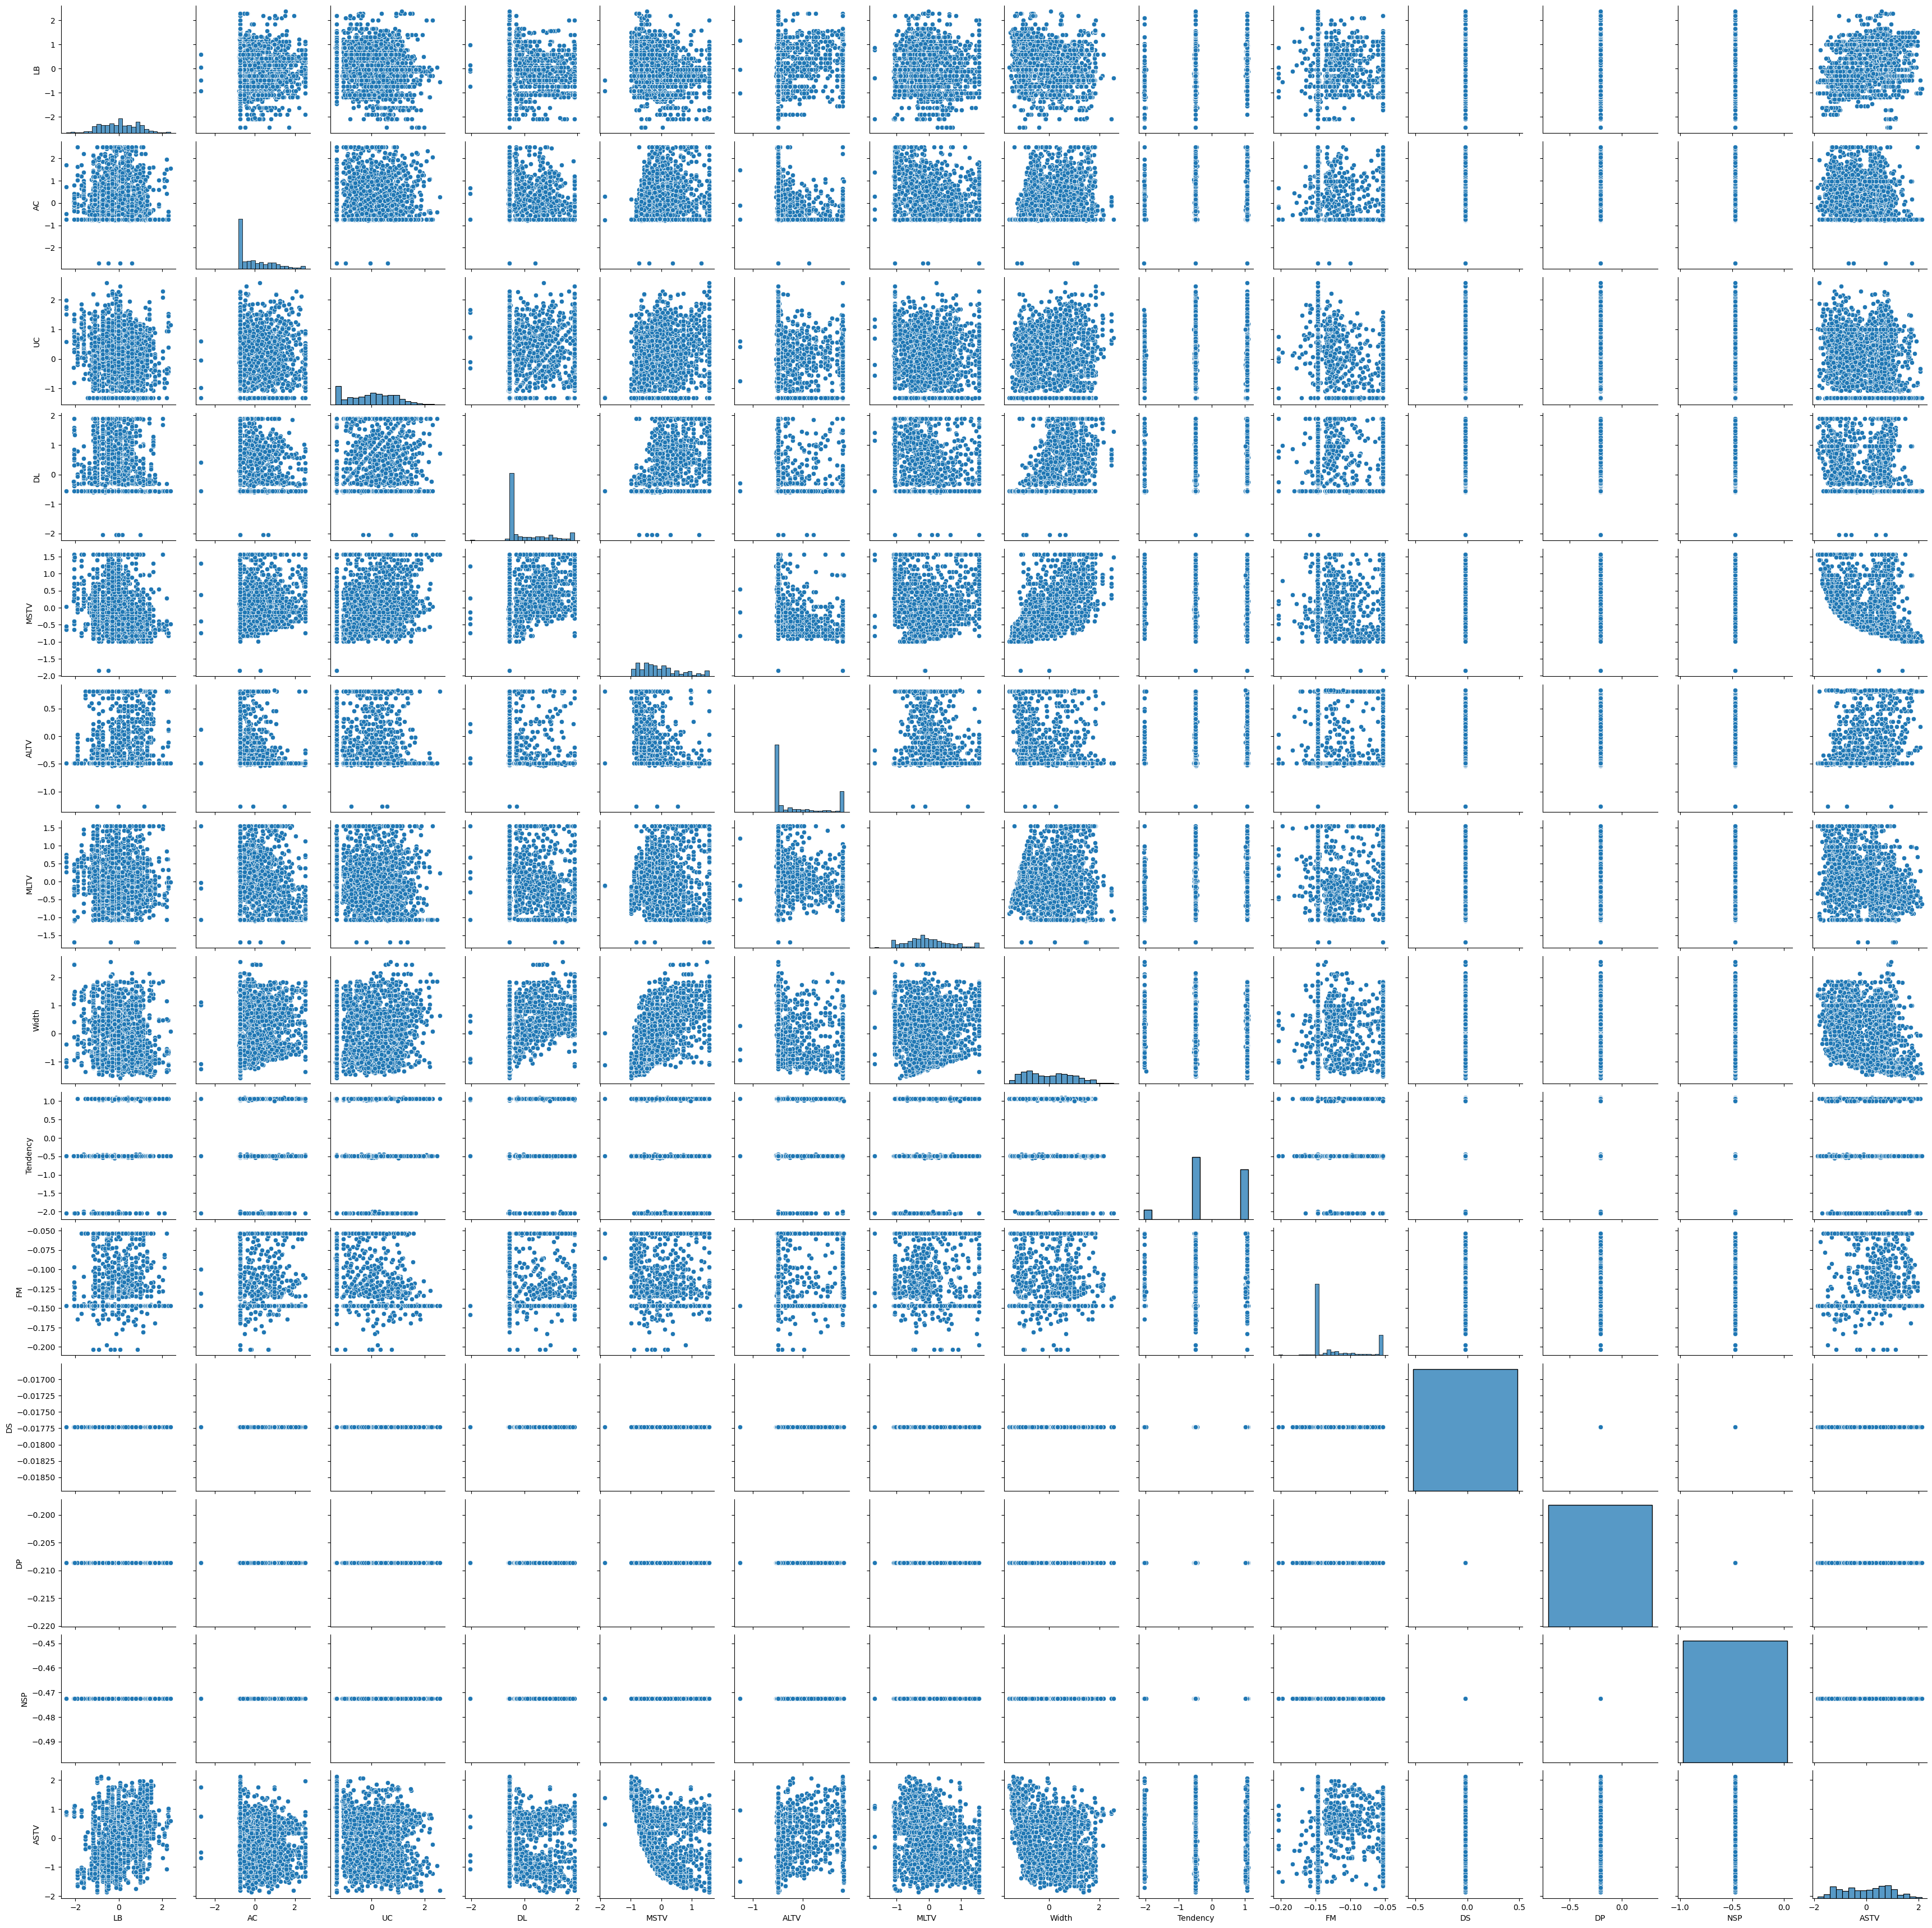

In [89]:
plt.figure(figsize = (20,20)) #relationship of each column with every columns
sns.pairplot(final_df)

<AxesSubplot:>

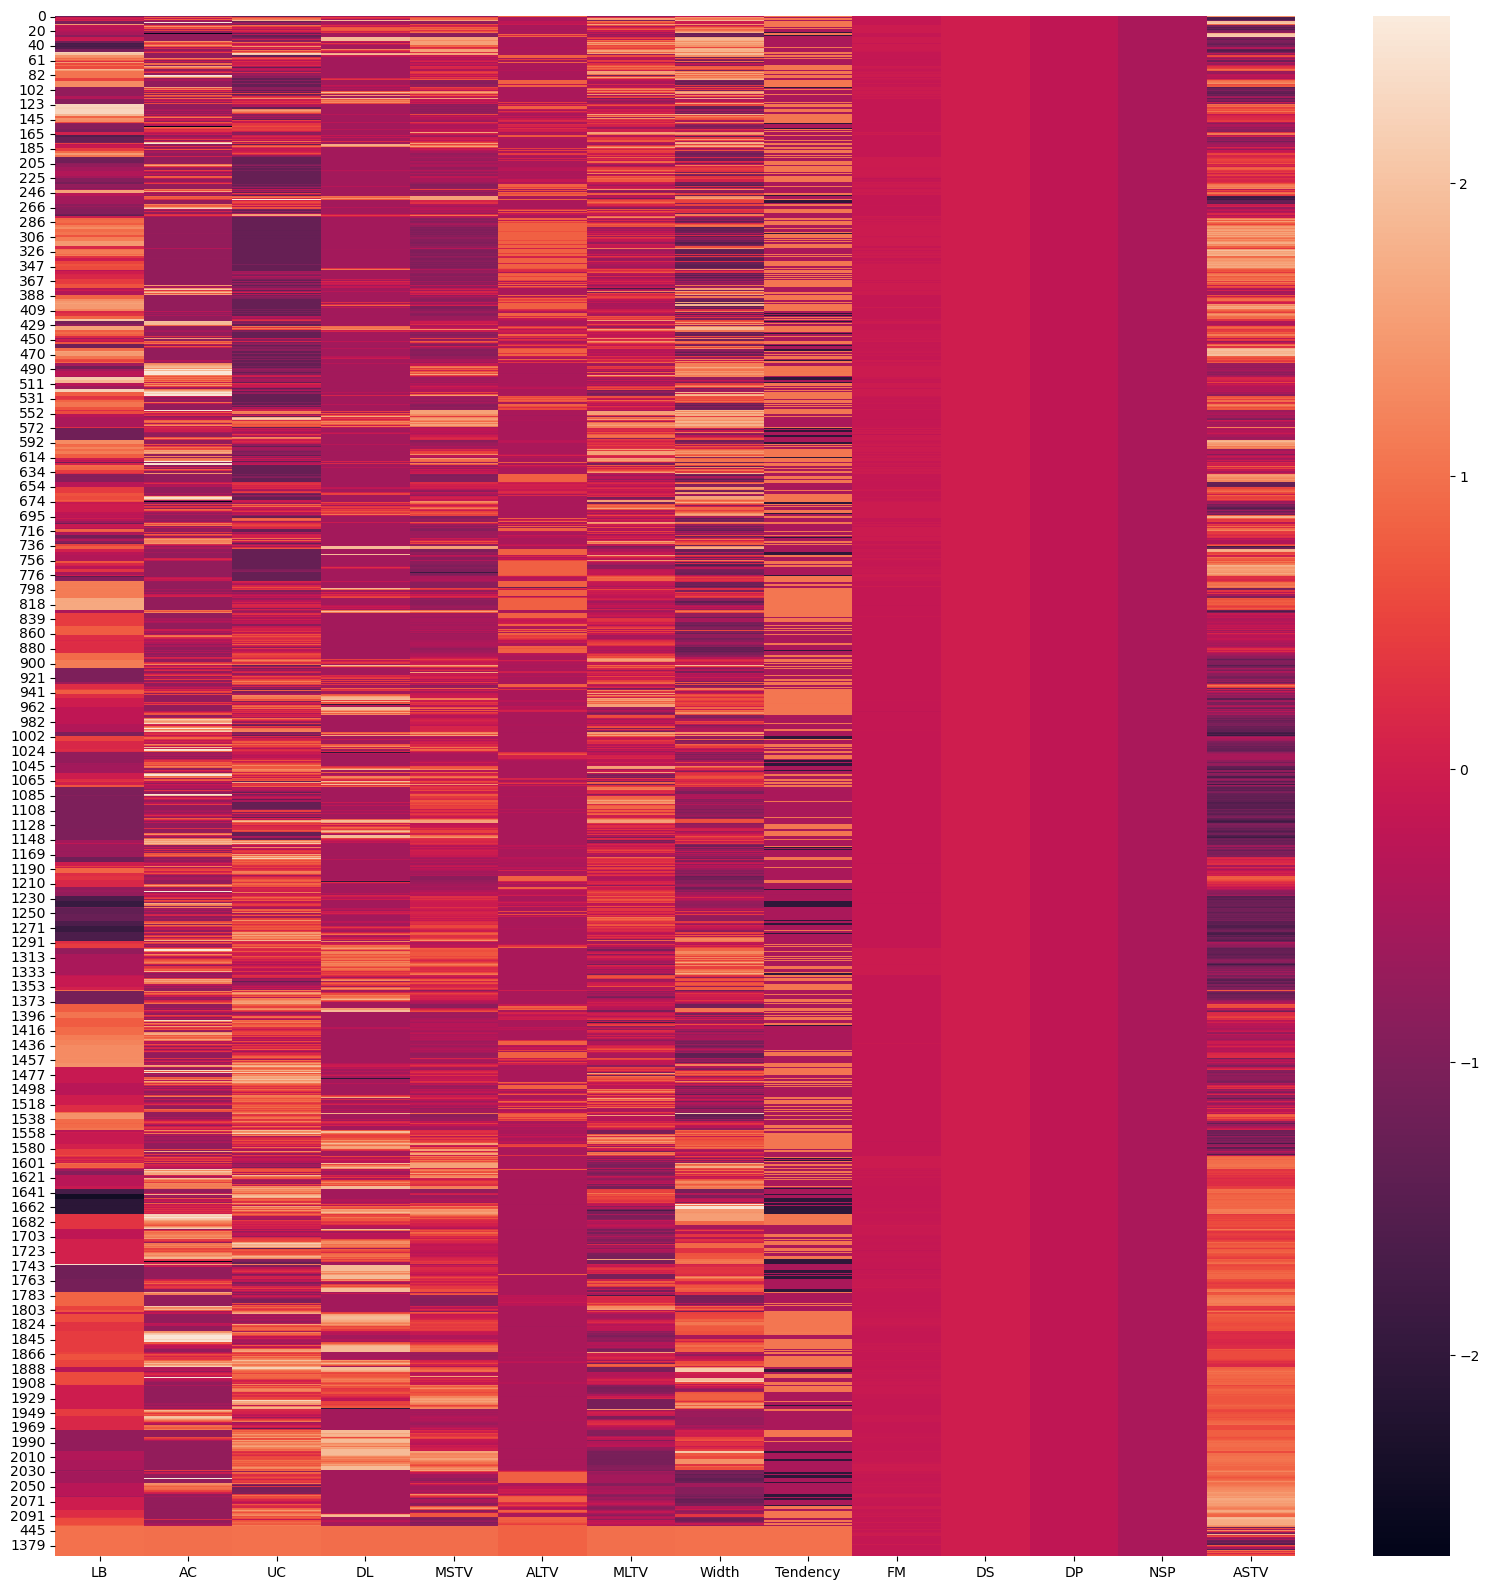

In [90]:
plt.figure(figsize = (20,20))
sns.heatmap(final_df)

In [91]:
pip install ydata_profiling

In [92]:
pip install ydata-profiling==4.1.2

Note: you may need to restart the kernel to use updated packages.


In [93]:
from ydata_profiling import ProfileReport

In [94]:
prof = ProfileReport(final_df)
prof.to_file(output_file= 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]